# Preliminar Analysis for Model iCZ946 (Microalgae metabolism for *Chlorella vulgaris* **UTEX 395**)  
---
### 1. Genome-scale metabolic model for the green alga *Chlorella vulgaris* **UTEX 395** accurately predicts phenotypes under autotrophic, heterotrophic, and mixotrophic growth contitions 

### 2. Predicting Dynamic Metabolic Demands in the Photosynthetic Eukaryote *Chlorella vulgaris* **UTEX 395**

#### Cristal Zuñiga (2016 - 2018) 
###### Doi: https://doi.org/10.1104/pp.16.00593 - https://doi.org/10.1104/pp.17.00605

## **1.** Import the required packages and first configuration

In [144]:
from importlib_metadata import files
from pathlib import Path
from cobra import Reaction, Metabolite
import pandas
import csv
import cobra
import copy
import random
from functools import reduce
import matplotlib.pyplot as plt

### **1.1.** Getting the model path

In [145]:
Here = Path().absolute()
FullModelPath = str(Here) + '/Model_iCZ946.json'

print(FullModelPath)

/mnt/c/users/flron/OneDrive/Tesis/Cobrapy Model Development/Models Test/Model Chlorella Analysis/Model_iCZ946.json


### **1.2.** Import the model into the environment

In [146]:
modelPhoto = cobra.io.load_json_model(FullModelPath)
## Full Model to reduce into photosynthesis module 
modelPhoto.name = 'iCZ946'
modelPhoto.optimize()

,fluxes,reduced_costs
PRISM_solar_litho,646.06656,0.0
PRISM_solar_exo,0.00000,0.0
PRISM_incandescent_60W,0.00000,0.0
PRISM_fluorescent_warm_18W,0.00000,0.0
PRISM_fluorescent_cool_215W,0.00000,0.0
...,...,...
PHCDbCv,0.00000,0.0
EHGLATCv,0.00000,0.0
PHCHGSCv,0.00000,0.0
4HGLSDCv,0.00000,0.0


### **1.3.** Define the configuration singleton  
### **1.4.** Select the Solver

In [147]:
cobra_config = cobra.Configuration()
cobra_config.solver = "glpk_exact"

## **2.** Getting the required reactions
---
 The purpose of this section is to <u> get all the reactions involved in</u> the *photophosphorylation process*, the __light reactions__, the reactions of *ROS* and the __pigment metabolism__ i

### **2.1** Define a Unique function to filter a sorted list of elements 

In [148]:
def unique(list1):

    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = sorted(list(list_set), key=str.lower)
    
    return unique_list

### **2.2** Print all subsystems present inside the model

In [149]:
Subsyst = unique([rxn_i.subsystem for rxn_i in modelPhoto.reactions])

### **2.3** Place the model subsystems inside a text file

In [150]:
with open(str(Here) + "/SubsystemsChlorella_iCZ946.txt", "w", encoding="utf-8") as f:
    count = 0
    for sys_i in Subsyst:
        count +=1
        f.write("%i. %s" % (count, "{"+sys_i+"}\n"))

### **2.4** Create a list of desired susbsystems to select the specific reactions

In [151]:
Subsyst_2_analysis = [
    'ATP maintenance',
    'Carotenoid biosynthesis',
    'Photosynthesis',
    'Transport, thylakoid lumen'
]

Subsyst_2_analysis

['ATP maintenance',
 'Carotenoid biosynthesis',
 'Photosynthesis',
 'Transport, thylakoid lumen']

### **2.5** Make a reactions list from the subsystems list beforementioned

<p style="font-size:10pt">Get the reactions classified in those subsystems </p> 

###### Few code to test

In [152]:
ObjReact = modelPhoto.reactions.ACACT3m

if ObjReact.subsystem in Subsyst_2_analysis:
    print("✔ %s reaction is in subsystems list" % ObjReact.name)
else:
    print("✘ %s reaction isn't in the subsystem list" % ObjReact.name)
    

✘ acetyl-CoA C-acyltransferase (C8:0) reaction isn't in the subsystem list


In [153]:
RxnDict = {rxn_i.name: rxn_i for rxn_i in modelPhoto.reactions if rxn_i.subsystem in Subsyst_2_analysis}

RxnDict = dict(sorted(RxnDict.items()))

RxnDict

{'9-cis-violaxanthin dioxygenase': <Reaction CVIOXAND at 0x7f526be82760>,
 '9-cis-violaxanthin synthesis': <Reaction CVIOXANS at 0x7f526be826d0>,
 'ATP synthase': <Reaction ATPSh at 0x7f526a9dfb50>,
 'Cyclic Electron Flow': <Reaction CEF at 0x7f526a9dfbb0>,
 'Diphosphate transport via diffusion, thylakoid lumen': <Reaction PPItu at 0x7f526bf4a220>,
 'Divalent cation (Mg2+) transport system, thylakoid': <Reaction MG2tu at 0x7f526bf4a250>,
 'Geranylgeranyl diphosphate transport via diffusion, thylakoid lumen': <Reaction GGDPtu at 0x7f526eee9f10>,
 'H2O transport by passive diffusion, Thylakoid Lumen': <Reaction H2Othu at 0x7f526ef7aaf0>,
 'Isopentenyl diphosphate transport via diffusion, thylakoid lumen': <Reaction PDPtu at 0x7f526bf4aac0>,
 'NADP transport  by free diffusion, Thylakoid Lumen': <Reaction NADPtu at 0x7f526bf4a850>,
 'NADPH transport  by free diffusion, Thylakoid Lumen': <Reaction NADPHtu at 0x7f526bf4a490>,
 'Neurosporene oxidoreductase': <Reaction NOR at 0x7f526d6159a0>,

##### Add photon reactions into the Reaction Vector

In [154]:
for met in modelPhoto.metabolites:
    if 'photon' in met.name:
        print(met.name)
        for rxn in met.reactions:
            if not rxn.name in RxnDict.keys():
                RxnDict[rxn.name] = rxn

RxnDict

photon (281 to 306 nm, UVB)
photon (406 to 454 nm, indigo/blue)
photon (378 to 482 nm, violet/blue)
photon (417 to 472 nm, indigo/blue)
photon (608 to 666 nm, orange/red)
photon (659 to 684 nm, red)
photon (662 to 691 nm, red)
photon (380 to 750 nm, visible spectrum)
photon490


{'9-cis-violaxanthin dioxygenase': <Reaction CVIOXAND at 0x7f526be82760>,
 '9-cis-violaxanthin synthesis': <Reaction CVIOXANS at 0x7f526be826d0>,
 'ATP synthase': <Reaction ATPSh at 0x7f526a9dfb50>,
 'Cyclic Electron Flow': <Reaction CEF at 0x7f526a9dfbb0>,
 'Diphosphate transport via diffusion, thylakoid lumen': <Reaction PPItu at 0x7f526bf4a220>,
 'Divalent cation (Mg2+) transport system, thylakoid': <Reaction MG2tu at 0x7f526bf4a250>,
 'Geranylgeranyl diphosphate transport via diffusion, thylakoid lumen': <Reaction GGDPtu at 0x7f526eee9f10>,
 'H2O transport by passive diffusion, Thylakoid Lumen': <Reaction H2Othu at 0x7f526ef7aaf0>,
 'Isopentenyl diphosphate transport via diffusion, thylakoid lumen': <Reaction PDPtu at 0x7f526bf4aac0>,
 'NADP transport  by free diffusion, Thylakoid Lumen': <Reaction NADPtu at 0x7f526bf4a850>,
 'NADPH transport  by free diffusion, Thylakoid Lumen': <Reaction NADPHtu at 0x7f526bf4a490>,
 'Neurosporene oxidoreductase': <Reaction NOR at 0x7f526d6159a0>,

### **2.6** Generate a __.csv__ file with the RxnVect Main Information

<p style="font-size:10pt">A short test to generate the Names of each reaction as Vector</p> 

In [155]:
RxnNames = list(RxnDict.keys())

count = 0
for rxn in RxnNames:
    count += 1

print(count)
RxnNames

76


['9-cis-violaxanthin dioxygenase',
 '9-cis-violaxanthin synthesis',
 'ATP synthase',
 'Cyclic Electron Flow',
 'Diphosphate transport via diffusion, thylakoid lumen',
 'Divalent cation (Mg2+) transport system, thylakoid',
 'Geranylgeranyl diphosphate transport via diffusion, thylakoid lumen',
 'H2O transport by passive diffusion, Thylakoid Lumen',
 'Isopentenyl diphosphate transport via diffusion, thylakoid lumen',
 'NADP transport  by free diffusion, Thylakoid Lumen',
 'NADPH transport  by free diffusion, Thylakoid Lumen',
 'Neurosporene oxidoreductase',
 'Non-growth associated ATP maintenance',
 'O2 transport (diffusion), Thylakoid Lumen',
 'abscisic-aldehyde oxidase',
 'alpha-carotene hydroxylase (alpha-cryptoxanthin forming)',
 'alpha-carotene hydroxylase (zeinoxanthin forming)',
 'alpha-carotene transport',
 'antheraxanthin,NADH:oxygen oxidoreductase',
 'antheraxanthin:ascorbate oxidoreductase',
 'beta carotene transport (Thylakoid Lumen)',
 'beta-Cryptoxanthin hydroxylase',
 'bet

<p style="font-size:10pt">Function to return string of compartment</p> 

In [156]:
compartmentsDict = modelPhoto.compartments

def CompartmentsPrint(Met):
    for comp in compartmentsDict.keys():
        if Met.compartment == comp:
            return compartmentsDict[comp]

ans = CompartmentsPrint(modelPhoto.metabolites.ala_DASH_L_m)

print(ans)

Mitochondrion


<p style="font-size:10pt">Function to make a String of metabolites into a determined reaction</p> 

In [157]:
def PrintMetFormula(RxnObj):
    FormulaStr = ""

    for met in RxnObj.metabolites.keys():
        if FormulaStr == "":
            FormulaStr = str(RxnObj.metabolites[met]) + " " + met.name + ' (' + CompartmentsPrint(met) + ')'
        else:
            FormulaStr = FormulaStr + "; " + str(RxnObj.metabolites[met]) + " " + met.name + ' (' + CompartmentsPrint(met) + ')'
    return FormulaStr


testR = PrintMetFormula(modelPhoto.reactions.AACPS3)

print(testR)

-1.0 acyl carrier protein (Chloroplast); -1.0 ATP (Chloroplast); -1.0 Hexadecanoate (n-C16:0) (Chloroplast); 1.0 AMP (Chloroplast); 1.0 H+ (Chloroplast); 1.0 Palmitoyl-ACP (n-C16:0ACP) (Chloroplast); 1.0 Diphosphate (Chloroplast)


Generate a list of reactions with the required attributes (columns)

In [158]:
RxnIDs = []
RxnSys = []
RxnGen = []
RxnFormula = []
RxnMets = []

count = 0
for rxn in RxnDict.values():
    count += 1
    RxnIDs.append(rxn.id)
    RxnSys.append(rxn.subsystem)
    RxnGen.append(rxn.gene_reaction_rule)
    RxnFormula.append(rxn.reaction)
    RxnMets.append(PrintMetFormula(rxn))  

<p style="font-size:10pt">Trying with pandas </p> 

In [159]:
df = pandas.DataFrame({'Name': RxnNames, 'ID': RxnIDs, 'Subsystem': RxnSys, 'Genes': RxnGen, 'Reaction': RxnFormula, 'Metabolites': RxnMets})
df.to_csv(str(Here) + "/iCZ946 - Photosynthesis Reactions - Initial.csv", index=False)

### **2.7** Search and Verify problematic reactions and metabolic pathways

#### **2.7.1** Search all reactions within plastoquinone is involved

In [160]:
for met in modelPhoto.metabolites:
    if 'plastoq' in str.lower(met.name):
        print(met.name + ' // '+ met.id)
        for rxn in met.reactions:
            print()
            print('  ' + rxn.name)
            print('     ' + rxn.reaction)
            print('     ' + PrintMetFormula(rxn))
        print('-------------')

oxidized plastoquinone // pq_h

  zeta-carotene desaturase
     o2_h + pqh2_h + zcaro_h <=> 2.0 h2o_h + norsp_h + pq_h
     -1.0 O2 (Chloroplast); -1.0 reduced plastoquinone (Chloroplast); -1.0 zeta-Carotene (Chloroplast); 2.0 H2O (Chloroplast); 1.0 Neurosporene (Chloroplast); 1.0 oxidized plastoquinone (Chloroplast)

  Neurosporene oxidoreductase
     norsp_h + o2_h + pqh2_h <=> 2.0 h2o_h + lyc_h + pq_h
     -1.0 Neurosporene (Chloroplast); -1.0 O2 (Chloroplast); -1.0 reduced plastoquinone (Chloroplast); 2.0 H2O (Chloroplast); 1.0 Lycopene (Chloroplast); 1.0 oxidized plastoquinone (Chloroplast)

  phytoene desaturase (1)
     phyto_h + pq_h <=> phytfl_h + pqh2_h
     -1.0 Phytoene (Chloroplast); -1.0 oxidized plastoquinone (Chloroplast); 1.0 Phytofluene (Chloroplast); 1.0 reduced plastoquinone (Chloroplast)

  phytoene desaturase (2)
     phytfl_h + pq_h <=> pqh2_h + zcaro_h
     -1.0 Phytofluene (Chloroplast); -1.0 oxidized plastoquinone (Chloroplast); 1.0 reduced plastoquinone (Chlo

<p style="font-size:10pt">As you can see, the plastoquinone production is not linked with the plastoquinone photosynthesis reactions in the model, as the met.id differ (plaq9_h and pqh2). It would be because the merging of different models</p> 

<p style="font-size:10pt">Also, the molecular formula is different in those metabolites</p> 

In [161]:
modelPhoto.metabolites.plaq9_h

Metabolite identifier,plaq9_h
Name,Plastoquinol-9
Memory address,0x07f526a8d9610
Formula,C53H82O2
Compartment,h
In 1 reaction(s),MSBQMh


In [162]:
modelPhoto.metabolites.pqh2_h

Metabolite identifier,pqh2_h
Name,reduced plastoquinone
Memory address,0x07f526de97fd0
Formula,C13H18O2
Compartment,h
In 4 reaction(s),"ZDS, NOR, PDS1, PDS2"


##### **2.7.1.2** Edit plastoquinone mistake in model 

<p style="font-size:10pt">Changing Photosynthetic Plastoquinol from biosynthetized Plastoquinol</p> 

In [163]:
_ = modelPhoto.metabolites

for rxn in modelPhoto.reactions:
    if _.pqh2_h in rxn.metabolites.keys():
        print(rxn.name)
        print('     Reaction before: ' + rxn.reaction)

        coeff = rxn.metabolites[_.get_by_id('pqh2_h')]
        rxn.add_metabolites({_.get_by_id('plaq9_h'): coeff})
        rxn.subtract_metabolites({_.get_by_id('pqh2_h'): coeff})
        rxn.notes = {'Fixed By': 'Rondón, Fabián (2022)'}
        
        print('     Reaction after: ' + rxn.reaction)
        print('--------------------')

Neurosporene oxidoreductase
     Reaction before: norsp_h + o2_h + pqh2_h <=> 2.0 h2o_h + lyc_h + pq_h
     Reaction after: norsp_h + o2_h + plaq9_h <=> 2.0 h2o_h + lyc_h + pq_h
--------------------
phytoene desaturase (1)
     Reaction before: phyto_h + pq_h <=> phytfl_h + pqh2_h
     Reaction after: phyto_h + pq_h <=> phytfl_h + plaq9_h
--------------------
phytoene desaturase (2)
     Reaction before: phytfl_h + pq_h <=> pqh2_h + zcaro_h
     Reaction after: phytfl_h + pq_h <=> plaq9_h + zcaro_h
--------------------
zeta-carotene desaturase
     Reaction before: o2_h + pqh2_h + zcaro_h <=> 2.0 h2o_h + norsp_h + pq_h
     Reaction after: o2_h + plaq9_h + zcaro_h <=> 2.0 h2o_h + norsp_h + pq_h
--------------------


In [164]:
modelPhoto.metabolites.plaq9_h.id = 'plaq9h2_h'
modelPhoto.metabolites.plaq9h2_h

Metabolite identifier,plaq9h2_h
Name,Plastoquinol-9
Memory address,0x07f526a8d9610
Formula,C53H82O2
Compartment,h
In 5 reaction(s),"MSBQMh, NOR, PDS1, ZDS, PDS2"


In [165]:
modelPhoto.metabolites.plaq9h2_h.notes = {'Fixed By': 'Rondón, Fabián (2022)'}
modelPhoto.reactions.MSBQMh.notes = {'Fixed By': 'Rondón, Fabián (2022)'}

<p style="font-size:10pt">Creating new plastoquinone to replace the other ones</p> 

In [166]:
plaq9h2_u = Metabolite(
    'plaq9h2_u',
    formula= 'C53H82O2',
    name = 'Plastoquinol-9',
    compartment = 'u'
)

plaq9h2_u.notes = {'Created By': 'Rondón, Fabián (2022)'}

plaq9h2_u

Metabolite identifier,plaq9h2_u
Name,Plastoquinol-9
Memory address,0x07f526e0566a0
Formula,C53H82O2
Compartment,u
In 0 reaction(s),


In [167]:
plaq9_u = Metabolite(
    'plaq9_u',
    formula= 'C53H80O2',
    name = 'Plastoquinone-9',
    compartment = 'u'
)

plaq9_u.notes = {'Created By': 'Rondón, Fabián (2022)'}

plaq9_u

Metabolite identifier,plaq9_u
Name,Plastoquinone-9
Memory address,0x07f526e056700
Formula,C53H80O2
Compartment,u
In 0 reaction(s),


In [168]:
plaq9_h = Metabolite(
    'plaq9_h',
    formula= 'C53H80O2',
    name = 'Plastoquinone-9',
    compartment = 'h'
)

plaq9_h.notes = {'Created By': 'Rondón, Fabián (2022)'}

plaq9_h

Metabolite identifier,plaq9_h
Name,Plastoquinone-9
Memory address,0x07f526e0567f0
Formula,C53H80O2
Compartment,h
In 0 reaction(s),


<p style="font-size:10pt">Replacing the created metabolites in the respective reactions</p> 

In [169]:
# Replacing Dictionary

MetReplace = {
    plaq9h2_u: 'pqh2_u',
    plaq9_u: 'pq_u',
    plaq9_h: 'pq_h'
}

modelPhoto.add_metabolites(MetReplace.keys())

In [170]:
_ = modelPhoto.metabolites

for newMet, oldMet in MetReplace.items():
    for rxn in modelPhoto.reactions:
        if _.get_by_id(oldMet) in rxn.metabolites.keys():
            print(rxn.name)
            print('     Reaction before: ' + rxn.reaction)

            coeff = rxn.metabolites[_.get_by_id(oldMet)]
            rxn.add_metabolites({newMet: coeff})
            rxn.subtract_metabolites({_.get_by_id(oldMet): coeff})
            rxn.notes = {'Fixed By': 'Rondón, Fabián (2022)'}
            
            print('     Reaction after: ' + rxn.reaction)
            print('--------------------')

cytochrome b6/f complex
     Reaction before: 2.0 h_h + 2.0 pccu2p_u + pqh2_u --> 4.0 h_u + 2.0 pccu1p_u + pq_u
     Reaction after: 2.0 h_h + 2.0 pccu2p_u + plaq9h2_u --> 4.0 h_u + 2.0 pccu1p_u + pq_u
--------------------
photosystem II (blue light-activated)
     Reaction before: 2.0 h2o_u + 4.0 photon438_u + 2.0 pq_u --> o2D_u + 2.0 pqh2_u
     Reaction after: 2.0 h2o_u + 4.0 photon438_u + 2.0 pq_u --> o2D_u + 2.0 plaq9h2_u
--------------------
photosystem II (red light-activated)
     Reaction before: 2.0 h2o_u + 4.0 photon673_u + 2.0 pq_u --> o2D_u + 2.0 pqh2_u
     Reaction after: 2.0 h2o_u + 4.0 photon673_u + 2.0 pq_u --> o2D_u + 2.0 plaq9h2_u
--------------------
cytochrome b6/f complex
     Reaction before: 2.0 h_h + 2.0 pccu2p_u + plaq9h2_u --> 4.0 h_u + 2.0 pccu1p_u + pq_u
     Reaction after: 2.0 h_h + 2.0 pccu2p_u + plaq9h2_u --> 4.0 h_u + 2.0 pccu1p_u + plaq9_u
--------------------
photosystem II (blue light-activated)
     Reaction before: 2.0 h2o_u + 4.0 photon438_u + 2

In [171]:
RemoveMets = []
for met in MetReplace.values():
    RemoveMets.append(modelPhoto.metabolites.get_by_id(met))

RemoveMets.append(modelPhoto.metabolites.get_by_id('pqh2_h'))

modelPhoto.remove_metabolites(RemoveMets)

In [172]:
for met in modelPhoto.metabolites:
    if 'plastoq' in str.lower(met.name):
        print(met.name + ' // '+ met.id)
        for rxn in met.reactions:
            print()
            print('  ' + rxn.name)
            print('     ' + rxn.reaction)
            print('     ' + PrintMetFormula(rxn))
            print('     ' + str(rxn.notes))
        print('-------------')

Plastoquinol-9 // plaq9h2_h

  MSBQ methyltransferase
     amet_h + msbq_h --> ahcys_h + h_h + plaq9h2_h
     -1.0 S-Adenosyl-L-methionine (Chloroplast); -1.0 2-Methyl-6-solanyl-1,4-benzoquinol (Chloroplast); 1.0 S-Adenosyl-L-homocysteine (Chloroplast); 1.0 H+ (Chloroplast); 1.0 Plastoquinol-9 (Chloroplast)
     {'Fixed By': 'Rondón, Fabián (2022)'}

  Neurosporene oxidoreductase
     norsp_h + o2_h + plaq9h2_h <=> 2.0 h2o_h + lyc_h + plaq9_h
     -1.0 Neurosporene (Chloroplast); -1.0 O2 (Chloroplast); 2.0 H2O (Chloroplast); 1.0 Lycopene (Chloroplast); -1.0 Plastoquinol-9 (Chloroplast); 1.0 Plastoquinone-9 (Chloroplast)
     {'Fixed By': 'Rondón, Fabián (2022)'}

  phytoene desaturase (1)
     phyto_h + plaq9_h <=> phytfl_h + plaq9h2_h
     -1.0 Phytoene (Chloroplast); 1.0 Phytofluene (Chloroplast); 1.0 Plastoquinol-9 (Chloroplast); -1.0 Plastoquinone-9 (Chloroplast)
     {'Fixed By': 'Rondón, Fabián (2022)'}

  zeta-carotene desaturase
     o2_h + plaq9h2_h + zcaro_h <=> 2.0 h2o_h + n

<p style="font-size:10pt">Create a Transport Reaction for plastoquinone</p> 

In [173]:
RxnT = Reaction('plaq9trhu')
RxnT.name = 'Plastoquinone transport (diffusion), Thylakoid Lumen'
RxnT.subsystem = 'Transport, thylakoid lumen'
RxnT.lower_bound = -1000
RxnT.notes = {'Created By': 'Rondón, Fabián (2022)'}
modelPhoto.add_reactions([RxnT])

RxnT.add_metabolites({
    plaq9_u: 1,
    plaq9_h: -1,
})

RxnT

Reaction identifier,plaq9trhu
Name,"Plastoquinone transport (diffusion), Thylakoid Lumen"
Memory address,0x07f52701ef8e0
Stoichiometry,plaq9_h <=> plaq9_u Plastoquinone-9 <=> Plastoquinone-9
GPR,
Lower bound,-1000
Upper bound,1000.0


In [174]:
RxnTh2 = Reaction('plaq9h2trhu')
RxnTh2.name = 'Plastoquinol transport (diffusion), Thylakoid Lumen'
RxnTh2.subsystem = 'Transport, thylakoid lumen'
RxnTh2.lower_bound = -1000
RxnTh2.notes = {'Created By': 'Rondón, Fabián (2022)'}
modelPhoto.add_reactions([RxnTh2])

RxnTh2.add_metabolites({
    plaq9h2_u: 1,
    modelPhoto.metabolites.plaq9h2_h: -1,
})

RxnTh2

Reaction identifier,plaq9h2trhu
Name,"Plastoquinol transport (diffusion), Thylakoid Lumen"
Memory address,0x07f526e056e20
Stoichiometry,plaq9h2_h <=> plaq9h2_u Plastoquinol-9 <=> Plastoquinol-9
GPR,
Lower bound,-1000
Upper bound,1000.0


In [175]:
for met in modelPhoto.metabolites:
    if 'plastoq' in str.lower(met.name):
        print(met.name + ' // '+ met.id)
        for rxn in met.reactions:
            print()
            print('  ' + rxn.name)
            print('     ' + rxn.reaction)
            print('     ' + PrintMetFormula(rxn))
            print('     ' + str(rxn.notes))
        print('-------------')

Plastoquinol-9 // plaq9h2_h

  Plastoquinol transport (diffusion), Thylakoid Lumen
     plaq9h2_h <=> plaq9h2_u
     1 Plastoquinol-9 (Thylakoid); -1 Plastoquinol-9 (Chloroplast)
     {'Created By': 'Rondón, Fabián (2022)'}

  MSBQ methyltransferase
     amet_h + msbq_h --> ahcys_h + h_h + plaq9h2_h
     -1.0 S-Adenosyl-L-methionine (Chloroplast); -1.0 2-Methyl-6-solanyl-1,4-benzoquinol (Chloroplast); 1.0 S-Adenosyl-L-homocysteine (Chloroplast); 1.0 H+ (Chloroplast); 1.0 Plastoquinol-9 (Chloroplast)
     {'Fixed By': 'Rondón, Fabián (2022)'}

  Neurosporene oxidoreductase
     norsp_h + o2_h + plaq9h2_h <=> 2.0 h2o_h + lyc_h + plaq9_h
     -1.0 Neurosporene (Chloroplast); -1.0 O2 (Chloroplast); 2.0 H2O (Chloroplast); 1.0 Lycopene (Chloroplast); -1.0 Plastoquinol-9 (Chloroplast); 1.0 Plastoquinone-9 (Chloroplast)
     {'Fixed By': 'Rondón, Fabián (2022)'}

  phytoene desaturase (1)
     phyto_h + plaq9_h <=> phytfl_h + plaq9h2_h
     -1.0 Phytoene (Chloroplast); 1.0 Phytofluene (Chlorop

#### **2.7.2** Search all reactions within Pheophytin is involved

In [176]:
for met in modelPhoto.metabolites:
    if 'pheoph' in str.lower(met.name):
        print(met.name + ' // '+ met.id)
        for rxn in met.reactions:
            print()
            print('  ' + rxn.name)
            print('     ' + rxn.reaction)
            print('     ' + PrintMetFormula(rxn))
        print('-------------')

Pheophorbide a // phphbda_h

  chlorophyllide a demetalase
     chlda_h <=> mg2_h + phphbda_h
     -1.0 Chlorophyllide a (Chloroplast); 1.0 Magnesium (Chloroplast); 1.0 Pheophorbide a (Chloroplast)

  pheophorbide demethoxycarbonylase
     3.0 h_h + phphbda_h <=> mfor_h + pyphphbda_h
     -3.0 H+ (Chloroplast); -1.0 Pheophorbide a (Chloroplast); 1.0 methyl formate (Chloroplast); 1.0 Pyropheophorbide a (Chloroplast)
-------------
Pheophytin a // phphtna_u

  chlorophyll a demetalase
     chla_u + h_u <=> mg2_u + phphtna_u
     -1.0 Chlorophyll a (Thylakoid); -1.0 H+ (Thylakoid); 1.0 Magnesium (Thylakoid); 1.0 Pheophytin a (Thylakoid)
-------------
Pyropheophorbide a // pyphphbda_h

  pheophorbide demethoxycarbonylase
     3.0 h_h + phphbda_h <=> mfor_h + pyphphbda_h
     -3.0 H+ (Chloroplast); -1.0 Pheophorbide a (Chloroplast); 1.0 methyl formate (Chloroplast); 1.0 Pyropheophorbide a (Chloroplast)
-------------


<p style="font-size:10pt">Pheophytin is just used in 1 reaction (equilibrium), instead of being used through the photosynthetic process</p> 

#### **2.7.3** Search all reactions within photosynthetic oxygen is involved

In [177]:
for met in modelPhoto.metabolites:
    if 'o2' in str.lower(met.id) and met.compartment == 'u':
        print(met.name + ' // '+ met.id)
        for rxn in met.reactions:
            print()
            print('  ' + rxn.name)
            print('  ' + rxn.id)
            print('     ' + rxn.reaction)
            print('     ' + PrintMetFormula(rxn))
        print('-------------')

O2 // o2_u

  cryptoxanthin hydroxylase
  CXHY
     crpxan_u + h_u + nadph_u + o2_u --> h2o_u + lut_u + nadp_u
     -1.0 alpha-Cryptoxanthin (Thylakoid); -1.0 H+ (Thylakoid); -1.0 Nicotinamide adenine dinucleotide phosphate - reduced (Thylakoid); -1.0 O2 (Thylakoid); 1.0 H2O (Thylakoid); 1.0 Lutein (Thylakoid); 1.0 Nicotinamide adenine dinucleotide phosphate (Thylakoid)

  beta-Cryptoxanthin hydroxylase
  BCRPTXANH
     bcrptxan_u + h_u + nadph_u + o2_u <=> h2o_u + nadp_u + zaxan_u
     -1.0 beta-Cryptoxanthin (Thylakoid); -1.0 H+ (Thylakoid); -1.0 Nicotinamide adenine dinucleotide phosphate - reduced (Thylakoid); -1.0 O2 (Thylakoid); 1.0 H2O (Thylakoid); 1.0 Nicotinamide adenine dinucleotide phosphate (Thylakoid); 1.0 Zeaxanthin (Thylakoid)

  lutein hydroxylase
  LUTH
     h_u + lut_u + nadph_u + o2_u <=> h2o_u + loroxan_u + nadp_u
     -1.0 H+ (Thylakoid); -1.0 Lutein (Thylakoid); -1.0 Nicotinamide adenine dinucleotide phosphate - reduced (Thylakoid); -1.0 O2 (Thylakoid); 1.0 H2O (T

<p style="font-size:10pt">Thylakoid oxygen is different from Dummy metabolite oxygen (O2D), just as referenced  by Chang et.al. 2011. However, it could take for granted several supositions, such as the oxygen species present inside thylakoid are from external oxygen, instead of photosynthetic oxygen. Thus, the external oxygen amount inside the thylakoid could not be enough to produce ROS, or to serve as pseudoclyclic photophosphorylation electron acceptor.</p> 

<p style="font-size:10pt">Aditionally, Hydrogen peroxide in the thylakoid doesn't have any transport reaction to the lumen or thylakoid</p> 

#### **2.7.4** Search all reactions within Ferredoxin is involved

In [178]:
for met in modelPhoto.metabolites:
    if 'ferred' in str.lower(met.name):
        print(met.name + ' // '+ met.id)
        for rxn in met.reactions:
            print()
            print('  ' + rxn.id)
            print('  ' + rxn.name)
            print('     ' + rxn.reaction)
            print('     ' + PrintMetFormula(rxn))
        print('-------------')

Oxidized ferredoxin // fdxox_c

  PEDS1801845Z9Z12Z15Z
  linoleate desaturase (18:0/18:4(5Z,9Z,12Z,15Z))
     2.0 fdxrd_c + 2.0 h_c + o2_c + pe1801835Z9Z12Z_c --> 2.0 fdxox_c + 2.0 h2o_c + pe1801845Z9Z12Z15Z_c
     -2.0 Reduced ferredoxin (Cytoplasm); -2.0 H+ (Cytoplasm); -1.0 O2 (Cytoplasm); -1.0 phosphatidylethanolamine (18:0/18:3(5Z,9Z,12Z)) (Cytoplasm); 2.0 Oxidized ferredoxin (Cytoplasm); 2.0 H2O (Cytoplasm); 1.0 phosphatidylethanolamine (18:0/18:4(5Z,9Z,12Z,15Z)) (Cytoplasm)

  DGTSDS1839Z12Z15Z1835Z9Z12Z
  linoleate desaturase (18:3(9Z,12Z,15Z)/18:3(5Z,9Z,12Z))
     dgts1829Z12Z1835Z9Z12Z_c + 2.0 fdxrd_c + 2.0 h_c + o2_c --> dgts1839Z12Z15Z1835Z9Z12Z_c + 2.0 fdxox_c + 2.0 h2o_c
     -1.0 diacylglyceryl-N,N,N-trimethylhomoserine (18:2(9Z,12Z)/18:3(5Z,9Z,12Z)) (Cytoplasm); -2.0 Reduced ferredoxin (Cytoplasm); -2.0 H+ (Cytoplasm); -1.0 O2 (Cytoplasm); 1.0 diacylglyceryl-N,N,N-trimethylhomoserine (18:3(9Z,12Z,15Z)/18:3(5Z,9Z,12Z)) (Cytoplasm); 2.0 Oxidized ferredoxin (Cytoplasm); 2.

In [179]:
modelPhoto.metabolites.fdxox_h

Metabolite identifier,fdxox_h
Name,Oxidized ferredoxin
Memory address,0x07f526be08070
Formula,Fe8S8X
Compartment,h
In 65 reaction(s),"DGDGD4DS1829Z12Z1634Z7Z10Z, HYDAh, DGDGD7DS1829Z12Z1617Z, PGD3TDS18111Z1613E, ACP1819ZD9DS, ACP1619ZD9DS, MGDGD4DS1819Z1644Z7Z10Z13Z, DGDGW6DS1819Z1627Z10Z, MGDGW3DS1839Z12Z15Z1644Z7Z10Z13Z2,..."


In [180]:
modelPhoto.metabolites.fdxox_u

Metabolite identifier,fdxox_u
Name,Oxidized ferredoxin
Memory address,0x07f526be088e0
Formula,Fe8S8X
Compartment,u
In 4 reaction(s),"FNORh, CEF, PSIred, PSIblue"


In [181]:
modelPhoto.metabolites.fdxrd_h

Metabolite identifier,fdxrd_h
Name,Reduced ferredoxin
Memory address,0x07f526be085b0
Formula,Fe8S8X
Compartment,h
In 65 reaction(s),"DGDGD4DS1829Z12Z1634Z7Z10Z, HYDAh, DGDGD7DS1829Z12Z1617Z, PGD3TDS18111Z1613E, ACP1819ZD9DS, ACP1619ZD9DS, MGDGD4DS1819Z1644Z7Z10Z13Z, DGDGW6DS1819Z1627Z10Z, MGDGW3DS1839Z12Z15Z1644Z7Z10Z13Z2,..."


In [182]:
modelPhoto.metabolites.fdxrd_u

Metabolite identifier,fdxrd_u
Name,Reduced ferredoxin
Memory address,0x07f526bafbc10
Formula,Fe8S8X
Compartment,u
In 4 reaction(s),"FNORh, CEF, PSIred, PSIblue"


<p style="font-size:10pt">Thylakoid reactions don't balance charges. It is assumed the ferredoxin transport 2 electrons in photosynthetic reactions when the ferredoxin only carries 1 electron.</p>

<p style="font-size:10pt">This is not generalized in the whole model, neglecting that the formula doesn't change in reduced and oxidized form. As a sample, the Ammonium: Ferredoxin reductase is well balanced, same as the charge balance show 1 electron per ferredoxin.</p>

$$6 Fdxrd + 8 H^{+} +NO_{2}^{-1} \rightarrow 6 Fdxox +2 H_{2}O + NH_{4}^{+} $$

$$ \text{Matter Balance } \checkmark $$
$$ \text{Charge balance:} $$
$$6 a + 8 -1 = 6 \cdot 0 + 2 \cdot 0 + 1 $$
$$6 a + 7 = 1$$
$$6 a = 6 \rightarrow a = 1 $$


##### **2.7.4.2** Edit ferredoxin---NADP+ reductase coefficients in model 

In [183]:
FNORh = modelPhoto.reactions.FNORh
FNORh.metabolites

{<Metabolite fdxrd_u at 0x7f526bafbc10>: -1.0,
 <Metabolite h_h at 0x7f526d7c40a0>: -1.0,
 <Metabolite nadp_h at 0x7f526ed9e0d0>: -1.0,
 <Metabolite fdxox_u at 0x7f526be088e0>: 1.0,
 <Metabolite nadph_h at 0x7f526ba36f40>: 1.0}

In [184]:
_ = modelPhoto.metabolites
print('Reaction before: ' + FNORh.reaction)

FNORh.add_metabolites({_.get_by_id('fdxrd_u'): -1, _.get_by_id('fdxox_u'): 1})
FNORh.notes = {'Fixed by': 'Rondón, Fabián (2022)'}

print('Reaction after: ' + FNORh.reaction)

Reaction before: fdxrd_u + h_h + nadp_h --> fdxox_u + nadph_h
Reaction after: 2.0 fdxrd_u + h_h + nadp_h --> 2.0 fdxox_u + nadph_h


In [185]:
modelPhoto.reactions.FNORh

Reaction identifier,FNORh
Name,ferredoxin---NADP+ reductase
Memory address,0x07f526a9dfca0
Stoichiometry,2.0 fdxrd_u + h_h + nadp_h --> 2.0 fdxox_u + nadph_h 2.0 Reduced ferredoxin + H+ + Nicotinamide adenine dinucleotide phosphate --> 2.0 Oxidized ferredoxin + Nicotinamide adenine dinucleotide phosphate - reduced
GPR,
Lower bound,0.0
Upper bound,1000.0


#### **2.7.5** proton transport via diffusion, thylakoid lumen

In [186]:
modelPhoto.reactions.Htu

Reaction identifier,Htu
Name,"proton transport via diffusion, thylakoid lumen"
Memory address,0x07f526ef7a880
Stoichiometry,h_h <=> h_u H+ <=> H+
GPR,
Lower bound,-1000.0
Upper bound,1000.0


<p style="font-size:10pt">Constraints are defined arbitrary without any reference</p>

#### **2.7.6** GTP GDP Elemental balance

In [187]:
for rxn in modelPhoto.metabolites.get_by_id('gdp_h').reactions:
    print(rxn.id)
    print(rxn.reaction)
    rxn.check_mass_balance

ADSSh
asp_DASH_L_h + gtp_h + imp_h --> dcamp_h + gdp_h + 3.0 h_h + pi_h


In [188]:
modelPhoto.metabolites.gtp_h

Metabolite identifier,gtp_h
Name,GTP
Memory address,0x07f526d7c4ee0
Formula,C10H12N5O14P3
Compartment,h
In 2 reaction(s),"GTPDH, ADSSh"


In [189]:
modelPhoto.metabolites.get_by_id('gtp_h')

Metabolite identifier,gtp_h
Name,GTP
Memory address,0x07f526d7c4ee0
Formula,C10H12N5O14P3
Compartment,h
In 2 reaction(s),"GTPDH, ADSSh"


##### **2.7.6.2** Edit ADSSh coefficients in model and GDP formula 

In [190]:
modelPhoto.metabolites.get_by_id('gdp_h').formula = 'C10H12N5O11P2'
modelPhoto.metabolites.get_by_id('gdp_h').notes = {'Fixed by': 'Rondón, Fabián (2022)'}
modelPhoto.metabolites.get_by_id('gdp_h')

Metabolite identifier,gdp_h
Name,GDP
Memory address,0x07f526de45fd0
Formula,C10H12N5O11P2
Compartment,h
In 1 reaction(s),ADSSh


In [191]:
modelPhoto.reactions.ADSSh.add_metabolites({modelPhoto.metabolites.h_h: -1})
modelPhoto.reactions.ADSSh.notes = {'Fixed by': 'Rondón, Fabián (2022)'}
modelPhoto.reactions.ADSSh.check_mass_balance()

{}

In [192]:
modelPhoto.reactions.ADSSh

Reaction identifier,ADSSh
Name,"adenylosuccinate synthase, chloroplast"
Memory address,0x07f526ed8b640
Stoichiometry,"asp_DASH_L_h + gtp_h + imp_h --> dcamp_h + gdp_h + 2.0 h_h + pi_h L-Aspartate + GTP + IMP --> N6-(1,2-Dicarboxyethyl)-AMP + GDP + 2.0 H+ + Phosphate"
GPR,(maker_Scaffold_248-augustus-gene-0.126)
Lower bound,0.0
Upper bound,1000.0


In [193]:
RxnT = Reaction('GTPtrhu')
RxnT.name = 'GTP transport (diffusion), chloroplast'
RxnT.subsystem = 'Transport, chloroplast'
RxnT.lower_bound = -1000
RxnT.notes = {'Created By': 'Rondón, Fabián (2022)'}
modelPhoto.add_reactions([RxnT])

RxnT.add_metabolites({
    modelPhoto.metabolites.gtp_h: 1,
    modelPhoto.metabolites.gtp_c: -1
})

RxnT

Reaction identifier,GTPtrhu
Name,"GTP transport (diffusion), chloroplast"
Memory address,0x07f526e056b50
Stoichiometry,gtp_c <=> gtp_h GTP <=> GTP
GPR,
Lower bound,-1000
Upper bound,1000.0


In [194]:
RxnGDPT = Reaction('GDPtrhu')
RxnGDPT.name = 'GDP transport (diffusion), chloroplast'
RxnGDPT.subsystem = 'Transport, chloroplast'
RxnGDPT.lower_bound = -1000
RxnGDPT.notes = {'Created By': 'Rondón, Fabián (2022)'}
modelPhoto.add_reactions([RxnGDPT])

RxnGDPT.add_metabolites({
    modelPhoto.metabolites.gdp_h: 1,
    modelPhoto.metabolites.gdp_c: -1
})

RxnGDPT

Reaction identifier,GDPtrhu
Name,"GDP transport (diffusion), chloroplast"
Memory address,0x07f526c33ef40
Stoichiometry,gdp_c <=> gdp_h GDP <=> GDP
GPR,
Lower bound,-1000
Upper bound,1000.0


In [195]:
for rxn in modelPhoto.metabolites.get_by_id('gtp_h').reactions:
    print(rxn.id)
    print(rxn.reaction)
    print('----------------')

GTPDH
gtp_h + 3.0 h2o_h --> 25dhpp_h + for_h + 2.0 h_h + ppi_h
----------------
ADSSh
asp_DASH_L_h + gtp_h + imp_h --> dcamp_h + gdp_h + 2.0 h_h + pi_h
----------------
GTPtrhu
gtp_c <=> gtp_h
----------------


#### **2.7.5** Checking several metabolites to take their information for the new model

In [196]:
for rxn in modelPhoto.reactions:
    if 'photon' in rxn.reaction:
        print(rxn.name + ' // ' + rxn.id)
        print('     ' + rxn.reaction)
        print('_______________')

spectral decomposition of solar light measured from Earth's surface // PRISM_solar_litho
     photonVis_e --> 4.26984325300204e-05 photon298_c + 0.088253056987783 photon437_u + 0.187390761056649 photon438_u + 0.114958292879089 photon450_h + 0.19581 photon490_h + 0.18566429641716 photon646_h + 0.08361649412414 photon673_u + 0.094404940130699 photon680_u
_______________
spectral decomposition of solar light measured from outer space // PRISM_solar_exo
     photonVis_e --> 0.009126633453201 photon298_c + 0.107054407672067 photon437_u + 0.224061663093904 photon438_u + 0.133591526308582 photon450_h + 0.20968 photon490_h + 0.17175215519119 photon646_h + 0.072897947189877 photon673_u + 0.084315507784363 photon680_u
_______________
spectral decomposition of 60W incandescent light bulb // PRISM_incandescent_60W
     photonVis_e --> 1.65224841134181e-05 photon298_c + 0.009993878664639 photon437_u + 0.024602315301096 photon438_u + 0.016276171066119 photon450_h + 0.053691 photon490_h + 0.229912500

In [197]:
modelPhoto.metabolites.chla_u

Metabolite identifier,chla_u
Name,Chlorophyll a
Memory address,0x07f526f21e4f0
Formula,C55H72MgN4O5
Compartment,u
In 8 reaction(s),"Biomass_Cvu_mixo_DASH_, Biomass_Cvu_auto_DASH_, CHLASP, GGCHLDAR, CHLADMT, CHLAE, Biomass_Cvu_hetero_DASH_, CHLAtu"


## **3.** Uploading new reactions and Metabolites into the model
---
 The purpose of this section is to <u> upload the previously developed photosynthetic model related with</u> the *photophosphorylation process*, the __new light reactions__, the photoinhibition and photoacclimation reactions (*ROS and singlet oxygen*) and the __Light Harvesting Complex__

### **3.1** Adding new metabolites to the Model

<p style="font-size:10pt">The metabolites were previously extracted from the proposed model, and as corresponding, each one was checked if it was already charged in the model.</p>

In [198]:
NewMets = str(Here) + '/metabolite_list.xlsx'
print(NewMets)

df = pandas.read_excel(NewMets, index_col=1)
MetsDict = df.to_dict('index')

Lon = MetsDict.keys().__len__()
print('%i metabolites to upload' %(Lon))

MetsDict

/mnt/c/users/flron/OneDrive/Tesis/Cobrapy Model Development/Models Test/Model Chlorella Analysis/metabolite_list.xlsx
91 metabolites to upload


{'1o2_u': {'Initial Formula': '1O2(L)',
  'name': 'Singlet Oxygen',
  'formula': 'O2',
  'compartment': 'u'},
 '1psII_680_u': {'Initial Formula': '1P680(T)',
  'name': 'PSII reaction center P680, singlet form',
  'formula': 'C220H284Mg4N16O20',
  'compartment': 'u'},
 '1psI_700_u': {'Initial Formula': '1P700',
  'name': 'PSI reaction center P700, singlet form',
  'formula': 'C110H142Mg2N8O10',
  'compartment': 'u'},
 '3psII_680_u': {'Initial Formula': '3P680(T)',
  'name': 'PSII reaction center P680, triplet form',
  'formula': 'C220H284Mg4N16O20',
  'compartment': 'u'},
 '7dhchsterol_c': {'Initial Formula': '7dhchsterol_c',
  'name': 'Cholesta-5,7-dien-3beta-ol',
  'formula': 'C27H44O',
  'compartment': 'c'},
 'adp_h': {'Initial Formula': 'ADP',
  'name': 'ADP',
  'formula': 'C10H12N5O10P2',
  'compartment': 'h'},
 'atp_h': {'Initial Formula': 'ATP',
  'name': 'ATP',
  'formula': 'C10H12N5O13P3',
  'compartment': 'h'},
 'bathorhodopsin_h': {'Initial Formula': 'bathorhodopsin_h',
  'na

<p style="font-size:10pt">Create a metabolite object for each metabolite in MetsDict</p>

In [199]:
MetList = []

for met, attr in MetsDict.items():
    
    metid = met

    metid = Metabolite(
        metid,
        formula = attr.get('formula'),
        name = attr.get('name'),
        compartment = attr.get('compartment')
    )

    metid.notes = {'Created By': 'Rondón, Fabián (2022)'}
    MetList.append(metid)

MetList

[<Metabolite 1o2_u at 0x7f52707aee80>,
 <Metabolite 1psII_680_u at 0x7f52707aea90>,
 <Metabolite 1psI_700_u at 0x7f52707ae910>,
 <Metabolite 3psII_680_u at 0x7f52707ae8b0>,
 <Metabolite 7dhchsterol_c at 0x7f52707aed00>,
 <Metabolite adp_h at 0x7f526d9b3f40>,
 <Metabolite atp_h at 0x7f526d9b3f70>,
 <Metabolite bathorhodopsin_h at 0x7f526d9b3e50>,
 <Metabolite ca2_u at 0x7f526d9b3d00>,
 <Metabolite ca2_h at 0x7f526d9b3a30>,
 <Metabolite ca2_c at 0x7f526d9b3fa0>,
 <Metabolite ca2_e at 0x7f526d9b3a00>,
 <Metabolite caro_u at 0x7f526d9b3970>,
 <Metabolite caroExc_u at 0x7f526d9b3dc0>,
 <Metabolite chla_u at 0x7f526d9b3eb0>,
 <Metabolite chla1_u at 0x7f526d9b3df0>,
 <Metabolite chla3_u at 0x7f526d9b3cd0>,
 <Metabolite chlda_u at 0x7f526d9b39a0>,
 <Metabolite cytbprd_u at 0x7f526d9b3b20>,
 <Metabolite cytbpox_u at 0x7f526d9b3fd0>,
 <Metabolite apocytfcrd_u at 0x7f526d9b3ee0>,
 <Metabolite apocytfcox_u at 0x7f526d9b3d90>,
 <Metabolite dvchlda_h at 0x7f526d9b3e80>,
 <Metabolite dvpchlda_h at 0x

<p style="font-size:10pt">Adding these metabolites to the model</p>

In [200]:
modelPhoto.add_metabolites(MetList)

modelPhoto.metabolites.caroExc_u

Metabolite identifier,caroExc_u
Name,"beta-Carotene, excited state"
Memory address,0x07f526d9b3dc0
Formula,C40H56
Compartment,u
In 0 reaction(s),


### **3.2** Clean up the model by removing old and unnecessary reactions that will be replaced by the new photosynthetic model

<p style="font-size:10pt">Photon reactions will be replaced, as well as photosynthetic reactions</p>

In [201]:
RemoveRxn = []

for rxn in modelPhoto.reactions:
    if 'photon' in rxn.reaction or 'photosynthesis' in str.lower(rxn.subsystem):
        RemoveRxn.append(rxn)

RemoveRxn.remove(modelPhoto.reactions.EX_photonVis_LPAREN_e_RPAREN_)
RemoveRxn.remove(modelPhoto.reactions.SUCDHh)

RemoveRxn

[<Reaction PRISM_solar_litho at 0x7f526c3074f0>,
 <Reaction PRISM_solar_exo at 0x7f526c3074c0>,
 <Reaction PRISM_incandescent_60W at 0x7f526c307670>,
 <Reaction PRISM_fluorescent_warm_18W at 0x7f526c307df0>,
 <Reaction PRISM_fluorescent_cool_215W at 0x7f526c307d30>,
 <Reaction PRISM_metal_halide at 0x7f526c307490>,
 <Reaction PRISM_high_pressure_sodium at 0x7f526c3072b0>,
 <Reaction PRISM_growth_room at 0x7f526e2ab8b0>,
 <Reaction PRISM_white_LED at 0x7f526e2abac0>,
 <Reaction PRISM_red_LED_array_653nm at 0x7f526ccb6130>,
 <Reaction PRISM_red_LED_674nm at 0x7f526ccb6fd0>,
 <Reaction PRISM_design_growth at 0x7f526d6e4dc0>,
 <Reaction DM_photon298_LPAREN_c_RPAREN_ at 0x7f52706a5d60>,
 <Reaction DM_photon437_LPAREN_u_RPAREN_ at 0x7f5270918e50>,
 <Reaction DM_photon438_LPAREN_u_RPAREN_ at 0x7f5270918c10>,
 <Reaction DM_photon450_LPAREN_h_RPAREN_ at 0x7f526e849f70>,
 <Reaction DM_photon490_LPAREN_h_RPAREN_ at 0x7f526e849910>,
 <Reaction DM_photon646_LPAREN_h_RPAREN_ at 0x7f526e849d90>,
 <Re

In [202]:
modelPhoto.remove_reactions(RemoveRxn)

<p style="font-size:10pt">Reactions to preserve</p>

In [203]:
for rxn in modelPhoto.reactions:
    if 'photon' in rxn.reaction or 'photosynthesis' in str.lower(rxn.subsystem):
        print(rxn.id + ' // ' + rxn.reaction)

EX_photonVis_LPAREN_e_RPAREN_ // photonVis_e <-- 
SUCDHh // fad_h + succ_h --> fadh2_h + fum_h


### **3.3** Loading new photosynthetic model to ModelPhoto 

<p style="font-size:10pt">Reactions were previously built according to respective bibliographic reviews. Furthermore, they have been proposed in an excel file to check matter balances altogether.</p>

In [204]:
from pandas import isnull

NewRxns = str(Here) + '/New_Reactions_List.xlsx'
print(NewRxns)

df = pandas.read_excel(NewRxns, index_col=0)
RxnsDict = {c:{k:i for k, i in row.iteritems() if not isnull(i)} for c, row in df.iterrows()}

RxnsDict

/mnt/c/users/flron/OneDrive/Tesis/Cobrapy Model Development/Models Test/Model Chlorella Analysis/New_Reactions_List.xlsx


{'ATPSh': {'Name': 'ATP synthase (lumen to thylakoid)',
  'Subsystem': 'Photosynthesis',
  'Lower Bound': 0.0,
  'Upper Bound': 1000.0,
  'adp_h': -3.0,
  'atp_h': 3.0,
  'h_u': -14.0,
  'h_h': 11.0,
  'h2o_h': 3.0,
  'pi_h': -3.0},
 'BCaro1O2STTrns': {'Name': 'Betacarotene - Oxygen Singlet triplet energy transfer',
  'Subsystem': 'Photoacclimation And PhotoInhibition',
  'Lower Bound': 0.0,
  'Upper Bound': 1000.0,
  '1o2_u': -1.0,
  'caro_u': 1.0,
  'caroExc_u': -1.0,
  'o2_u': 1.0},
 'CAT': {'Name': 'Catalase',
  'Subsystem': 'Photoacclimation And PhotoInhibition',
  'Lower Bound': 0.0,
  'Upper Bound': 1000.0,
  'h2o_h': 2.0,
  'h2o2_h': -2.0,
  'o2_h': 1.0},
 'ChlorSenzBcaro': {'Name': 'Chlorophyll Desensitization by Beta-Carotene',
  'Subsystem': 'Photosynthesis',
  'Lower Bound': 0.0,
  'Upper Bound': 1000.0,
  'caro_u': 1.0,
  'caroExc_u': -1.0,
  'chla_u': -1.0,
  'chla3_u': 1.0},
 'ChlorSenzZaxn': {'Name': 'Chlorophyll Desensitization by Zeaxanthin',
  'Subsystem': 'Photoaccl

In [205]:
RxnList = []
_ = modelPhoto.metabolites
properties = ['name', 'subsystem', 'lower_bound', 'upper_bound']

for rxn, attr in RxnsDict.items():
    
    rxnid = rxn

    rxnid = Reaction(rxnid)
    rxnid.name = attr.get('Name')
    rxnid.subsystem = attr.get('Subsystem')
    rxnid.lower_bound = attr.get('Lower Bound')
    rxnid.upper_bound = attr.get('Upper Bound')
    rxnid.notes = {'Created By': 'Rondón, Fabián (2022)'}
    modelPhoto.add_reactions([rxnid])

    RxnMetDict = {}
    for k, coeff in attr.items():
        if k in MetsDict.keys():
            RxnMetDict[_.get_by_id(k)] = coeff

    rxnid.add_metabolites(RxnMetDict)

    RxnList.append(rxnid)

RxnList


[<Reaction ATPSh at 0x7f52707ae850>,
 <Reaction BCaro1O2STTrns at 0x7f52707ae8e0>,
 <Reaction CAT at 0x7f5270586b50>,
 <Reaction ChlorSenzBcaro at 0x7f52707ae190>,
 <Reaction ChlorSenzZaxn at 0x7f526a716ee0>,
 <Reaction ChlorIC at 0x7f52707ae730>,
 <Reaction CEFQCycle at 0x7f526a99a2b0>,
 <Reaction QCyclCytF at 0x7f526a99a040>,
 <Reaction QCyclFeS2 at 0x7f526a896760>,
 <Reaction QCyclPlaq9h2 at 0x7f526a896940>,
 <Reaction QCyclCytBp at 0x7f526e31cd00>,
 <Reaction CBFPC at 0x7f526d0f8d90>,
 <Reaction FNORh at 0x7f526f1a3070>,
 <Reaction KokCycleS01 at 0x7f526d0ecf40>,
 <Reaction KokCycleS34 at 0x7f526a8964f0>,
 <Reaction KokCycleS12 at 0x7f52700858e0>,
 <Reaction KokCycleS23 at 0x7f52700858b0>,
 <Reaction KokCycleS40 at 0x7f526daeecd0>,
 <Reaction LCHIIExcTrn at 0x7f526e056550>,
 <Reaction MEHLER at 0x7f526dec1940>,
 <Reaction NADTRHD at 0x7f526c33efd0>,
 <Reaction NGAM_D1u at 0x7f52700853a0>,
 <Reaction NGAM_P680u at 0x7f526c33e7f0>,
 <Reaction PSIprimaTrns at 0x7f526ab969d0>,
 <Reacti

In [206]:
modelPhoto.reactions.OXYG1DEGp655

Reaction identifier,OXYG1DEGp655
Name,Singlet oxygen degeneration
Memory address,0x07f526c2bf400
Stoichiometry,2.0 1o2_u --> 2.0 o2_u + photon655_u 2.0 Singlet Oxygen --> 2.0 O2 + photon (640 to 670 nm)
GPR,
Lower bound,0.0
Upper bound,50.0


In [207]:
for rxn in modelPhoto.metabolites.get_by_id('1psII_680_u').reactions:
    print(rxn.id + ' // ' + rxn.reaction)
    print(rxn.notes)
    print('________________________')

P680SGTp445 // photon445_u + psII_680_u --> 1psII_680_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
P680SGTp595 // photon595_u + psII_680_u --> 1psII_680_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
P680SGTp745 // photon745_u + psII_680_u --> 1psII_680_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
P680SGTp535 // photon535_u + psII_680_u --> 1psII_680_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
LCHIIExcTrn // chla3_u + psII_680_u --> 1psII_680_u + chla_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
P680SGTp475 // photon475_u + psII_680_u --> 1psII_680_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
PSIIprimaTrns // 1psII_680_u + phphtna_u --> phphtn_rd_u + psII_680ox_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
P680SGTp565 // photon565_u + psII_680_u --> 1psII_680_u
{'Created By': 'Rondón, Fabián (2022)'}
________________________
P680SGTp415

### **3.4** Cleaning the model of unused metabolites

In [208]:
RemoveMets = []

for met in modelPhoto.metabolites:
    if len(met.reactions) == 0:
        RemoveMets.append(met)

RemoveMets

[<Metabolite photon298_c at 0x7f526e349b20>,
 <Metabolite photon437_u at 0x7f526e349f10>,
 <Metabolite photon438_u at 0x7f526e349d90>,
 <Metabolite photon450_h at 0x7f526e349970>,
 <Metabolite photon646_h at 0x7f526e349e20>,
 <Metabolite photon673_u at 0x7f526e349a90>,
 <Metabolite photon680_u at 0x7f526e349a30>,
 <Metabolite photon490_h at 0x7f526baab3d0>]

In [209]:
modelPhoto.remove_metabolites(RemoveMets)

## **4.** Testing the new model with the previous model
---

### **4.1** Define required functions to analyze respective data

#### **4.1.1** Function to print reactions in which a metabolite is involved

In [210]:
def get_reactions_of_met(model, met, s = 0, ignore_types = (),only_types = (), verbose = True):
    met_stoich = 0
    
    if only_types:
        only_reaction_types = tuple([getattr(model,i) for i in only_types])
    elif ignore_types:
        ignore_reaction_types = tuple([getattr(model,i) for i in ignore_types])
    
    reactions = []

    if not hasattr(model.metabolites, met):
        return reactions

    for rxn in model.metabolites.get_by_id(met).reactions:
        if only_types and not isinstance(rxn, only_reaction_types):
            continue
        elif ignore_types and isinstance(rxn, ignore_reaction_types):
            continue
        
        reactants = [met.id for met in rxn.reactants]
        products = [met.id for met in rxn.products]

        try:
            pos = 1 if met in products else -1
            rev = 1 if rxn.lower_bound < 0 else 0
            fwd = 1 if rxn.upper_bound > 0 else 0
        except:
            if verbose:
                print(rxn.id, 'symbolic bounds')
            else:
                pass

        try:
            if not s:
                reactions.append(rxn)
                if verbose:
                    print('(', rxn.id, rxn.lower_bound, rxn.upper_bound,')', '\t',rxn.reaction)
            elif s == pos*fwd or s == -pos*rev:
                reactions.append(rxn)
                if verbose:
                    print('(', rxn.id, rxn.lower_bound, rxn.upper_bound,')', '\t',rxn.reaction)

        except:
            if verbose:
                print(rxn.id, 'no reaction')
            else:
                pass
    return reactions



#### **4.1.2** Function to print into a data frame reactions and fluxes in which a metabolite is involved

In [211]:
def flux_based_reactions(model, met_id, only_types=(), ignore_types = (), threshold = 0., flux_dict=0, growth_symbol='mu'):
    solution = model.optimize()
    model.solution = solution

    if not flux_dict:
        flux_dict = model.solution.fluxes.to_dict()
    
    reactions = get_reactions_of_met(model, met_id, only_types = only_types, ignore_types = ignore_types, verbose=False)
    
    if len(reactions) == 0:
        print('No reactions found for {}'.format(met_id))
        return

    result_dict = {}
    for rxn in reactions:
        if rxn.id not in flux_dict:
            print('{} not in fluxes'.format(rxn.id))
            continue
        
        result_dict[rxn.id] = {}
        
        for rxn_met, stoich in rxn.metabolites.items():
            if rxn_met.id == met_id:
                if hasattr(stoich, 'subs'):
                    coeff = float(stoich.subs(growth_symbol,flux_dict['biomass_dilution']))
                else:
                    coeff = stoich
                
                result_dict[rxn.id]['lb'] = rxn.lower_bound
                result_dict[rxn.id]['ub'] = rxn.upper_bound
                result_dict[rxn.id]['rxn_flux'] = flux_dict[rxn.id] 
                result_dict[rxn.id]['met_flux'] = flux_dict[rxn.id]*coeff
                result_dict[rxn.id]['reaction'] = rxn.reaction
                
                break
    
    pandas.set_option('display.max_colwidth', None)
    df = pandas.DataFrame.from_dict(result_dict).T
    return df.loc[df['met_flux'].abs().sort_values(ascending=False).index]

#### **4.1.3** Function to print into a data frame reactions and fluxes depending on a given attribute

In [212]:
def flux_reactions_by_Attr(model, attrval, attr, metid = 'None', flux_dict = 0):
    solution = model.optimize()
    model.solution = solution

    if not flux_dict:
        flux_dict = model.solution.fluxes.to_dict()
    
    reactions = model.reactions

    result_dict = {}
    for rxn in reactions:
        if rxn.id not in flux_dict:
            print('{} not in fluxes'.format(rxn.id))
            continue
        
        if getattr(rxn, attr) == attrval:   
            result_dict[rxn.id] = {}
            if metid in rxn.reaction:
                coeff = rxn.metabolites.get(model.metabolites.get_by_id(metid))
            else:
                coeff = 0
            
            result_dict[rxn.id]['lb'] = rxn.lower_bound
            result_dict[rxn.id]['ub'] = rxn.upper_bound
            result_dict[rxn.id]['flux'] = flux_dict[rxn.id]
            result_dict[rxn.id]['reaction'] = rxn.reaction
            result_dict[rxn.id]['met_flux'] = flux_dict[rxn.id]*coeff
    
    pandas.set_option('display.max_colwidth', None)
    df = pandas.DataFrame.from_dict(result_dict).T
    return df.loc[df['flux'].abs().sort_values(ascending=False).index]

### **4.2** Publish the model until this point 

In [213]:
modelPhoto.name = 'iFR946'
cobra.io.save_json_model(modelPhoto, 'CheckpointTest.json')

In [216]:
modelTest = cobra.io.load_json_model(str(Here)+'/CheckpointTest.json')
modelTest.reactions.PRISM_solar_litho.bounds = (0, 1000)
modelTest.reactions.PRISM_white_LED.bounds = (0, 0)

for rxn in modelTest.reactions:
    if rxn.subsystem == 'Photoacclimation And PhotoInhibition':
        if not rxn.id in ['ChlorSenzZaxn']:
            rxn.bounds = (0, 0)

In [747]:
modelOrig = cobra.io.load_json_model(FullModelPath)

### **4.3** Test the model to verify bounds

<p style="font-size:10pt">Additional reactions were previously added into the reaction_list file, to solve flux inconcistencies and infeasible solutions. Demands for photon295 and photon325 were added because vitamin D3 isn't pulled out form the model, because vitd3 in not required biomass reaction. Furthermore, mn2 exchange reactions were also uploaded preventing infeasible solutions because photoinhibition</p>

In [217]:
GlobalSol = modelTest.optimize()
GlobalSol

,fluxes,reduced_costs
EX_h_LPAREN_e_RPAREN_,-0.013467,0.000000
EX_h2o_LPAREN_e_RPAREN_,-10.000000,-0.007712
EX_pi_LPAREN_e_RPAREN_,-0.008795,0.000000
EX_nh4_LPAREN_e_RPAREN_,0.000000,-0.038561
EX_no3_LPAREN_e_RPAREN_,-0.079264,0.000000
...,...,...
DM_OUTphoton625,0.000000,0.000000
DM_OUTphoton655,0.000000,0.000000
DM_OUTphoton685,0.000000,0.000000
DM_OUTphoton715,0.000000,0.000000


In [139]:
LightRxn = 'ZEAXExcp'
b = 20
for rxn in modelTest.reactions:
    if LightRxn in rxn.id:
        rxn.bounds = (0, b)

Maximize
1.0*Biomass_Cvu_auto_DASH_ - 1.0*Biomass_Cvu_auto_DASH__reverse_02895


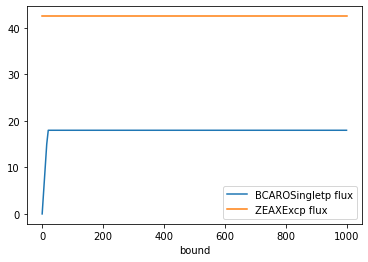

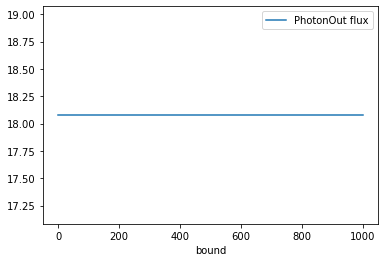

,bound,PhotonOut flux,BCAROSingletp flux,ZEAXExcp flux,μₓ:,Photon Absorption
1000,1000.0,18.078,17.985,42.499,0.038561,981.922
995,995.0,18.078,17.985,42.499,0.038561,981.922
990,990.0,18.078,17.985,42.499,0.038561,981.922
985,985.0,18.078,17.985,42.499,0.038561,981.922
980,980.0,18.078,17.985,42.499,0.038561,981.922
...,...,...,...,...,...,...
20,20.0,18.078,17.985,42.499,0.038561,981.922
15,15.0,18.078,15.000,42.499,0.038561,981.922
10,10.0,18.078,10.000,42.499,0.038561,981.922
5,5.0,18.078,5.000,42.499,0.038561,981.922


In [218]:
boundL = [1000 - bound*5 for bound in range(201)]
modelTest.reactions.PRISM_solar_litho.bounds = (1000, 1000)
RBA = {}
ReactTest2 = 'ZEAXExcp'
ReactAnalysis = 'BCAROSingletp'
ReactTest = [rxn for rxn in modelTest.reactions if ReactTest2 in rxn.id]

print(modelTest.objective)
for b in boundL:
    GlobalSol = 0
    RBA[b] = {}
    ReactList = []
    for rxn in modelTest.reactions:
        if ReactAnalysis in rxn.id:
            rxn.bounds = (0, b)
            ReactList.append(rxn)

    GlobalSol = modelTest.optimize()
    modelTest.solution = GlobalSol
    flux_dict = modelTest.solution.fluxes.to_dict()

    if modelTest.solution.status != 'optimal':
        break

    photonf = 0
    ReactAbs = 0
    ReactTestAbs = 0
    for rxn in modelTest.reactions:
        if 'OUTphoton' in rxn.id:
            photonf = photonf + flux_dict[rxn.id]
        elif rxn in ReactList:
            ReactAbs = ReactAbs + flux_dict[rxn.id]
        elif rxn in ReactTest:
            ReactTestAbs = ReactTestAbs + flux_dict[rxn.id]
   
    RBA[b]['bound'] = b
    RBA[b]['PhotonOut flux'] = photonf
    RBA[b][ReactAnalysis + ' flux'] = ReactAbs
    RBA[b][ReactTest2 + ' flux'] = ReactTestAbs
    RBA[b]['\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}:'] = flux_dict['Biomass_Cvu_auto_DASH_']
    RBA[b]['Photon Absorption'] = flux_dict['PRISM_solar_litho'] - photonf

pandas.set_option('display.max_colwidth', None)
df = pandas.DataFrame.from_dict(RBA).T
ax = df.plot(x = 'bound',  y = ReactAnalysis + ' flux', kind = 'line')
df.plot(ax = ax, x = 'bound',  y = ReactTest2 + ' flux', kind = 'line')
df.plot(x = 'bound',  y = 'PhotonOut flux', kind = 'line')

plt.show()
df

In [134]:
RBA

{1000: {'bound': 1000,
  'PhotonOut flux': 18.078,
  'ZEAXExcp flux': 115.469,
  'BCAROSingletp flux': 27.985,
  'μₓ:': 0.038560620042751924,
  'Photon Absorption': 981.922},
 995: {'bound': 995,
  'PhotonOut flux': 18.078,
  'ZEAXExcp flux': 115.469,
  'BCAROSingletp flux': 27.985,
  'μₓ:': 0.038560620042751924,
  'Photon Absorption': 981.922},
 990: {'bound': 990,
  'PhotonOut flux': 18.078,
  'ZEAXExcp flux': 115.469,
  'BCAROSingletp flux': 27.985,
  'μₓ:': 0.038560620042751924,
  'Photon Absorption': 981.922},
 985: {'bound': 985,
  'PhotonOut flux': 18.078,
  'ZEAXExcp flux': 115.469,
  'BCAROSingletp flux': 27.985,
  'μₓ:': 0.038560620042751924,
  'Photon Absorption': 981.922},
 980: {'bound': 980,
  'PhotonOut flux': 18.078,
  'ZEAXExcp flux': 115.469,
  'BCAROSingletp flux': 27.985,
  'μₓ:': 0.038560620042751924,
  'Photon Absorption': 981.922},
 975: {'bound': 975,
  'PhotonOut flux': 18.078,
  'ZEAXExcp flux': 115.469,
  'BCAROSingletp flux': 27.985,
  'μₓ:': 0.0385606200427

In [143]:
flux_based_reactions(modelTest, 'chlda_u')

,lb,ub,rxn_flux,met_flux,reaction
CHLASP,0.0,1000.0,0.000051,-0.000051,chlda_u + pdp_u --> chla_u + h_u + ppi_u
PCHLDp505,0.0,1000.0,0.000051,0.000051,h_h + nadph_h + pchlda_h + photon505_u --> chlda_u + nadp_h
PCHLDp415,0.0,1000.0,0.0,0.0,h_h + nadph_h + pchlda_h + photon415_u --> chlda_u + nadp_h
PCHLDp685,0.0,1000.0,0.0,0.0,h_h + nadph_h + pchlda_h + photon685_u --> chlda_u + nadp_h
CHLASG,0.0,1000.0,0.0,-0.0,chlda_u + ggdp_u --> ggchlda_u + h_u + ppi_u
PCHLDp445,0.0,1000.0,0.0,0.0,h_h + nadph_h + pchlda_h + photon445_u --> chlda_u + nadp_h
PCHLDp715,0.0,1000.0,0.0,0.0,h_h + nadph_h + pchlda_h + photon715_u --> chlda_u + nadp_h
PCHLDp625,0.0,1000.0,0.0,0.0,h_h + nadph_h + pchlda_h + photon625_u --> chlda_u + nadp_h
PCHLDp595,0.0,1000.0,0.0,0.0,h_h + nadph_h + pchlda_h + photon595_u --> chlda_u + nadp_h
CHLDA1tu,0.0,1000.0,0.0,-0.0,atp_h + chlda_u + h2o_h --> adp_h + chlda_h + h_h + pi_h


In [74]:
flux_reactions_by_Attr(modelTest, 'Spectral decomposition', 'subsystem', 'photon445_c')

,lb,ub,flux,reaction,met_flux
PRISM_solar_litho,0,1000,137.971765,photonVis_e --> 5.9e-05 photon265_u + 0.005656 photon295_u + 0.012363 photon325_u + 0.017857 photon355_u + 0.022499 photon385_u + 0.041042 photon415_u + 0.051459 photon445_u + 0.062454 photon475_u + 0.067298 photon505_u + 0.074427 photon535_u + 0.081602 photon565_u + 0.087673 photon595_u + 0.090866 photon625_u + 0.092985 photon655_u + 0.096292 photon685_u + 0.097518 photon715_u + 0.09795 photon745_u,0.0
DM_OUTphoton325,0.0,1000.0,1.705745,photon325_u -->,0.0
DM_OUTphoton295,0.0,1000.0,0.780368,photon295_u -->,0.0
DM_OUTphoton265,0.0,1000.0,0.00814,photon265_u -->,0.0
DM_OUTphoton535,0.0,0.0,0.0,photon535_u -->,0.0
DM_OUTphoton715,0.0,0.0,0.0,photon715_u -->,0.0
DM_OUTphoton685,0.0,0.0,0.0,photon685_u -->,0.0
DM_OUTphoton655,0.0,0.0,0.0,photon655_u -->,0.0
DM_OUTphoton625,0.0,0.0,0.0,photon625_u -->,0.0
DM_OUTphoton595,0.0,0.0,0.0,photon595_u -->,0.0


### **4.3.2** Add Photon flux Constraints

<p style="font-size:10pt"> Photon flux constraints were added according to absorbance data for each fotoactive reaction. This was made to generate a photon consumption preference for maximal teorical absorbance.The absorbance were taked from several papers. These data were processed by digitalization to get an average abnsorbance per each photon in each reaction. Thus, each photon could react in several photoactive reactions. As a result of that, it was needed to normalize the photon absorbance in those reactions where the same photon is present. Thus the following constraints were made by the next procedure</p>

$$ \sum \phi[r_{PRISM}]\varepsilon_{\gamma_{i}} -\phi[r_{DM\gamma_{i}}] = \phi[\gamma_{ABS}]$$
$$ a_{i}\cdot\phi[\gamma_{ABS}] \ge \phi[r_{XZ}]$$

$$ \text{Where }\phi[r_{XZ}]\text{ is the flux for the reaction: } X + \gamma_{i} \rightarrow Z$$
$$ \text{And }a_{i}\text{ corresponds with the relative absorption of photon } \gamma_{i} \text{ for XZ reaction}$$
$$ a_{i} \text{ also was normalized with other absorption constants present in other fotoactive reactions for same photon} $$

$$ \phi[\gamma_{ABS}] - \frac{\phi[r_{XZ}]}{a_{i}} \ge 0 $$


<p style="font-size:10pt"> Photon absorption constants charging</p>


In [164]:
df = pandas.read_csv(str(Here)+ '/Photoactive Reactions/PrismReaction Coefficients Normalized.csv')
constraints = df.to_dict('index')

PhotoactiveRxn = ['Beta-Carotene - Chla Action Spectrum (N)', 'LHCI Absorption Spectrum (N)', 'LHCII Absorption Spectrum (N)', 'Chla Absorption Spectrum (N)', 'OEC Photoinhibition Action Spectra (N)', 'Protochlorophyllide photoreductase Absorption Spectrum (N)', 'Divinyl Protochlorophyllide photoreductase Absorption Spectrum (N)', 'Rhodopsin photoisomerase Activity Spectrum (N)', 'Vitamin D3 Synthesis Activity Spectrum (N)', 'Xanthophylls Action Absorption  (N)']

_ = modelTest.reactions
constEq = {}
for dict_i in constraints.values():
    if 'photon' in dict_i.get('Unnamed: 0'):
        Name = dict_i.get('Unnamed: 0')
        constEq[Name] = {}
        for k in dict_i.keys():
            if k in PhotoactiveRxn and float(dict_i[k]) != 0:
                IDRxn = constraints[17][k] + Name[-3:]
                rxn = _.get_by_id(IDRxn)
                constEq[Name][rxn] = -float(dict_i[k])

constEq

{'photon265': {<Reaction OECLghtDMGp265 at 0x7fcf548e5370>: -1.2132544533246186,
  <Reaction VITD3Sp265 at 0x7fcf5491ecd0>: -5.689233844405527},
 'photon295': {<Reaction OECLghtDMGp295 at 0x7fcf548f3b50>: -2.287911883168556,
  <Reaction VITD3Sp295 at 0x7fcf5491ed00>: -1.7764506353802503},
 'photon325': {<Reaction OECLghtDMGp325 at 0x7fcf548f3c40>: -1.0648655980600192,
  <Reaction VITD3Sp325 at 0x7fcf5491edf0>: -16.416492407496396},
 'photon355': {<Reaction P700SGTp355 at 0x7fcf5491eeb0>: -5.162297942521717,
  <Reaction P680SGTp355 at 0x7fcf5492c970>: -4.0694449897585425,
  <Reaction LHCIIabsp355 at 0x7fcf5493c430>: -4.0694449897585425,
  <Reaction OECLghtDMGp355 at 0x7fcf548f3d30>: -3.1973992450813986},
 'photon385': {<Reaction BCAROSingletp385 at 0x7fcf548d84f0>: -7.454551161552848,
  <Reaction P700SGTp385 at 0x7fcf5491ef70>: -4.903913590062825,
  <Reaction P680SGTp385 at 0x7fcf5492ca30>: -3.7565157180076127,
  <Reaction LHCIIabsp385 at 0x7fcf5493c4f0>: -3.7565157180076127,
  <Reactio

<p style="font-size:10pt"> Load new constraints into the model as was explained before </p>

In [165]:
_ = modelTest.reactions

for photon, eq in constEq.items():
    sum = 0
    for rxn, coeff in eq.items():
        photonName = photon + '_u'
        photonMet = modelTest.metabolites.get_by_id(photonName)
        sum = sum + coeff * rxn.flux_expression
        for rxnL in _:
            if 'PRISM_' in rxnL.id:
                if photonMet in _.get_by_id(rxnL.id).metabolites.keys():
                    sum = sum + _.get_by_id(rxnL.id).metabolites.get(photonMet) * rxnL.flux_expression
            elif 'DM_OUT' + photon in rxnL.id:
                sum = sum - rxnL.flux_expression
    
    print(photon)
    print(sum)

    # constr = modelTest.problem.Constraint(
    #     sum,
    #     lb = 0,
    #     name = photon + '_csrt_flux')

    # print(constr)
    # modelTest.add_cons_vars(constr)        


photon265
-2.0*DM_OUTphoton265 + 2.0*DM_OUTphoton265_reverse_2424e - 1.21325445332462*OECLghtDMGp265 + 1.21325445332462*OECLghtDMGp265_reverse_d0323 + 0.000118*PRISM_solar_litho - 0.000118*PRISM_solar_litho_reverse_fdc58 - 5.68923384440553*VITD3Sp265 + 5.68923384440553*VITD3Sp265_reverse_6b8e8
photon295
-2.0*DM_OUTphoton295 + 2.0*DM_OUTphoton295_reverse_1f3be - 2.28791188316856*OECLghtDMGp295 + 2.28791188316856*OECLghtDMGp295_reverse_c678d + 0.011312*PRISM_solar_litho - 0.011312*PRISM_solar_litho_reverse_fdc58 + 0.00083*PRISM_white_LED - 0.00083*PRISM_white_LED_reverse_b292f - 1.77645063538025*VITD3Sp295 + 1.77645063538025*VITD3Sp295_reverse_af1bc
photon325
-2.0*DM_OUTphoton325 + 2.0*DM_OUTphoton325_reverse_31be5 - 1.06486559806002*OECLghtDMGp325 + 1.06486559806002*OECLghtDMGp325_reverse_40096 + 0.024726*PRISM_solar_litho - 0.024726*PRISM_solar_litho_reverse_fdc58 + 0.001286*PRISM_white_LED - 0.001286*PRISM_white_LED_reverse_b292f - 16.4164924074964*VITD3Sp325 + 16.4164924074964*VITD3S

### **4.3.3** Modifying the Objective Function in the solver to maximize photon absorption

<p style="font-size:10pt">Due to the previous constraints loaded into the model, it is necessary to maximize photon absorption, since the model prefers to throw out the photons into demand reactions, instead of absorbing these</p>

In [147]:
# modelTest = cobra.io.load_json_model(str(Here)+'/CheckpointTest.json')
modelTest.reactions.PRISM_solar_litho.bounds = (1000, 1000)
modelTest.reactions.PRISM_white_LED.bounds = (0, 0)
# {modelTest.reactions.Biomass_Cvu_auto_DASH_: 2} |

BOFDict = {rxn: [met for met in rxn.metabolites.keys()][0] for rxn in modelTest.reactions if 'OUTphoton' in rxn.id}
sum = modelTest.reactions.Biomass_Cvu_auto_DASH_.flux_expression
for rxn, met in BOFDict.items():
    sum = sum - 0.0001*rxn.flux_expression

sum

min_obj = modelTest.problem.Objective(
    sum,
    direction='max') 

modelTest.objective = min_obj

print(modelTest.objective)
GlobalSol = modelTest.optimize()

print()
print('\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}: ' + str(GlobalSol.fluxes['Biomass_Cvu_auto_DASH_']))

GlobalSol

Maximize
1.0*Biomass_Cvu_auto_DASH_ - 1.0*Biomass_Cvu_auto_DASH__reverse_02895 - 0.0001*DM_OUTphoton265 + 0.0001*DM_OUTphoton265_reverse_2424e - 0.0001*DM_OUTphoton295 + 0.0001*DM_OUTphoton295_reverse_1f3be - 0.0001*DM_OUTphoton325 + 0.0001*DM_OUTphoton325_reverse_31be5 - 0.0001*DM_OUTphoton355 + 0.0001*DM_OUTphoton355_reverse_87d48 - 0.0001*DM_OUTphoton385 + 0.0001*DM_OUTphoton385_reverse_08ed5 - 0.0001*DM_OUTphoton415 + 0.0001*DM_OUTphoton415_reverse_cb72d - 0.0001*DM_OUTphoton445 + 0.0001*DM_OUTphoton445_reverse_2f46d - 0.0001*DM_OUTphoton475 + 0.0001*DM_OUTphoton475_reverse_a74bc - 0.0001*DM_OUTphoton505 + 0.0001*DM_OUTphoton505_reverse_26ef7 - 0.0001*DM_OUTphoton535 + 0.0001*DM_OUTphoton535_reverse_7ae31 - 0.0001*DM_OUTphoton565 + 0.0001*DM_OUTphoton565_reverse_309a0 - 0.0001*DM_OUTphoton595 + 0.0001*DM_OUTphoton595_reverse_a0173 - 0.0001*DM_OUTphoton625 + 0.0001*DM_OUTphoton625_reverse_f7099 - 0.0001*DM_OUTphoton655 + 0.0001*DM_OUTphoton655_reverse_de021 - 0.0001*DM_OUTphoton685 

,fluxes,reduced_costs
EX_h_LPAREN_e_RPAREN_,0.000,0.000000
EX_h2o_LPAREN_e_RPAREN_,0.000,0.000000
EX_pi_LPAREN_e_RPAREN_,0.000,0.000000
EX_nh4_LPAREN_e_RPAREN_,0.000,-0.018494
EX_no3_LPAREN_e_RPAREN_,0.000,0.013870
...,...,...
DM_OUTphoton625,90.866,0.000000
DM_OUTphoton655,92.985,0.000000
DM_OUTphoton685,96.292,0.000000
DM_OUTphoton715,97.518,0.000000


In [99]:
space = [2.5*i/100000 - 0.001 for i in range(41)]
BOFSA = {}
light = [i*49.5 for i in range(21)]
count = 0

for j in light:
    modelTest.reactions.PRISM_solar_litho.bounds = (j, j)
    print('flux:' + str(j))
    for i in space:
        BOFSA[count] = {}
        
        BOFDict = {modelTest.reactions.Biomass_Cvu_auto_DASH_: 1} | {rxn: i for rxn in modelTest.reactions if 'OUTphoton' in rxn.id}
        modelTest.objective = BOFDict

        solution = modelTest.optimize()
        modelTest.solution = solution
        flux_dict = modelTest.solution.fluxes.to_dict()
        print('     coef: ' + str(i) + ' flux: ' + str(flux_dict['Biomass_Cvu_auto_DASH_']))

        BOFSA[count]['\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}'] = flux_dict['Biomass_Cvu_auto_DASH_']
        
        photonf = 0
        for rxn in modelTest.reactions:
            if 'OUTphoton' in rxn.id:
                photonf = photonf + flux_dict[rxn.id]
                
        BOFSA[count]['PhotonIN flux'] = flux_dict['PRISM_solar_litho']
        BOFSA[count]['PhotonOut flux'] = photonf
        BOFSA[count]['solution'] = modelTest.solution.objective_value
        BOFSA[count]['light constraint'] = j
        BOFSA[count]['BOF Coeff'] = i
        count += 1

print('FINISH!!! gunurrea')
    
pandas.set_option('display.max_colwidth', None)
df = pandas.DataFrame.from_dict(BOFSA).T
# df.plot(x = space,  y = 'PhotonOut flux', kind = 'line')
# plt.plot(space, df['PhotonIN flux'], 'b-')
df


flux:0.0
     coef: -0.001 flux: 0.0
     coef: -0.0009750000000000001 flux: 0.0
     coef: -0.00095 flux: 0.0
     coef: -0.000925 flux: 0.0
     coef: -0.0009 flux: 0.0
     coef: -0.000875 flux: 0.0
     coef: -0.0008500000000000001 flux: 0.0
     coef: -0.000825 flux: 0.0
     coef: -0.0008 flux: 0.0
     coef: -0.0007750000000000001 flux: 0.0
     coef: -0.00075 flux: 0.0
     coef: -0.000725 flux: 0.0
     coef: -0.0007000000000000001 flux: 0.0
     coef: -0.000675 flux: 0.0
     coef: -0.00065 flux: 0.0
     coef: -0.000625 flux: 0.0
     coef: -0.0006000000000000001 flux: 0.0
     coef: -0.000575 flux: 0.0
     coef: -0.00055 flux: 0.0
     coef: -0.0005250000000000001 flux: 0.0
     coef: -0.0005 flux: 0.0
     coef: -0.00047500000000000005 flux: 0.0
     coef: -0.00045 flux: 0.0
     coef: -0.00042500000000000003 flux: 0.0
     coef: -0.0004000000000000001 flux: 0.0
     coef: -0.000375 flux: 0.0
     coef: -0.00035000000000000005 flux: 0.0
     coef: -0.000325 flux: 0.0
    

,μₓ,PhotonIN flux,PhotonOut flux,solution,light constraint,BOF Coeff
0,0.000000,0.0,0.000000,0.000000,0.0,-0.001000
1,0.000000,0.0,0.000000,0.000000,0.0,-0.000975
2,0.000000,0.0,0.000000,0.000000,0.0,-0.000950
3,0.000000,0.0,0.000000,0.000000,0.0,-0.000925
4,0.000000,0.0,0.000000,0.000000,0.0,-0.000900
...,...,...,...,...,...,...
856,0.003697,990.0,826.404322,-0.078943,990.0,-0.000100
857,0.003697,990.0,826.404322,-0.058283,990.0,-0.000075
858,0.003697,990.0,826.404322,-0.037623,990.0,-0.000050
859,0.003697,990.0,826.404322,-0.016963,990.0,-0.000025


In [100]:
D2BOFSA = {}

for coeff in space:
    D2BOFSA[coeff] = {}
    for Dict_i in BOFSA.values():
        if Dict_i.get('BOF Coeff') == coeff:
            D2BOFSA[coeff][Dict_i.get('PhotonIN flux')] = Dict_i.get('\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}')

pandas.set_option('display.max_colwidth', None)
d2f = pandas.DataFrame.from_dict(D2BOFSA).T

d2f

,0.0,49.5,99.0,148.5,198.0,247.5,297.0,346.5,396.0,445.5,...,544.5,594.0,643.5,693.0,742.5,792.0,841.5,891.0,940.5,990.0
-0.001000,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000975,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000950,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000925,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000900,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000875,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000850,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000825,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000800,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697
-0.000775,0.0,0.000185,0.00037,0.000555,0.000739,0.000924,0.001109,0.001294,0.001479,0.001664,...,0.002033,0.002218,0.002403,0.002588,0.002773,0.002958,0.003143,0.003327,0.003512,0.003697


Text(0.5, 0, 'PhotonOut flux')

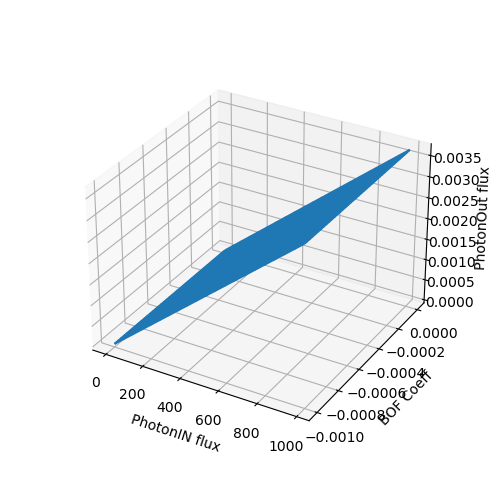

In [101]:
%matplotlib ipympl

import numpy as np

x = d2f.columns
y = d2f.index

Xm, Ym = np.meshgrid(x,y)
Z = d2f.values

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
auto_add_to_figure=False
fig.add_axes(ax)
ax.plot_wireframe(Xm, Ym, Z, label='Photon demand')
ax.set_xlabel('PhotonIN flux', fontsize=10, rotation=150)
ax.set_ylabel('BOF Coeff')
ax.set_zlabel('PhotonOut flux', fontsize=10, rotation=60)


### **4.4** Metabolite Sensitivity Analysis trhough the photosynthetic module

#### **4.4.1** Algorythm to make a random metabolite order

In [76]:
MetList = [met for met in modelTest.metabolites if met.notes == {'Created By': 'Rondón, Fabián (2022)'}]

MetLen = list(range(0, len(MetList)-1))
random.shuffle(MetLen)

MetList = [MetList[i] for i in MetLen]

MetList

[<Metabolite photonOUT415_c at 0x7f2dd21a0670>,
 <Metabolite 1psII_680_u at 0x7f2dd219aaf0>,
 <Metabolite chla3_u at 0x7f2dd219aca0>,
 <Metabolite psI_700ox_u at 0x7f2dd219afa0>,
 <Metabolite oec0_u at 0x7f2dd21a00d0>,
 <Metabolite photonOUT565_c at 0x7f2dd21a0760>,
 <Metabolite photonOUT505_c at 0x7f2dd21a0700>,
 <Metabolite apocytfcox_u at 0x7f2dd219ad60>,
 <Metabolite 3psII_680_u at 0x7f2dd219ab50>,
 <Metabolite oecd3_u at 0x7f2dd21a01c0>,
 <Metabolite phphtn_rd_u at 0x7f2dd219afd0>,
 <Metabolite photonOUT475_c at 0x7f2dd21a06d0>,
 <Metabolite apocytfcrd_u at 0x7f2dd219ad30>,
 <Metabolite photon685_c at 0x7f2dd21a04f0>,
 <Metabolite oec2_u at 0x7f2dd21a0130>,
 <Metabolite photon565_c at 0x7f2dd21a0430>,
 <Metabolite 1o2_u at 0x7f2dd219aac0>,
 <Metabolite caroExc_u at 0x7f2dd219ac40>,
 <Metabolite photon535_c at 0x7f2dd21a0400>,
 <Metabolite plaq9_h at 0x7f2dd219aa90>,
 <Metabolite photon745_c at 0x7f2dd21a0550>,
 <Metabolite photon385_c at 0x7f2dd21a0310>,
 <Metabolite photonOUT535_

### **4.4.2** Function to calculate a numerical derivative

In [77]:
def NumDerivative(f_x, xVect):
    dx = (xVect[-1] - xVect[0])/(len(xVect)-1)
    dy = []
    try:
        for i in range(len(xVect)):
            if i == 0:
                dydx = (f_x[i+1]-f_x[i])/dx
            elif i == len(xVect) - 1:
                dydx = (f_x[i]-f_x[i-1])/dx
            else:
                dydx = (f_x[i+1]-f_x[i-1])/(2 * dx)
                
            dy.append(dydx)
    except:
        if len(f_x) != len(xVect):
            print("The uploaded Vectors don't have the same dimension")
        else:
            return False
    
    return dy

#### **4.4.3** Function to generate an artificial demand reaction per metabolite

In [78]:
def RxnDM_MSA(model, metid, upperb, lowerb):
    if hasattr(model.metabolites, metid):
        met = getattr(model.metabolites, metid)
    else:
        print("%s is not present in model" % (metid))
        return False

    # Artificial demand reaction
    rxnidDM = 'DM_out' + met.id
    RxnDM = Reaction(rxnidDM)
    RxnDM.name = met.name + ' Demand'
    RxnDM.subsystem = 'Artificial Demand (MSA)'
    RxnDM.bounds = (lowerb, upperb)
    RxnDM.notes = {'Created By': 'Rondón, Fabián (2022)'}
    model.add_reaction(RxnDM)
    RxnDM.add_metabolites({met:-1})

    return RxnDM

In [79]:
def MSA_metFin(model, N, RxnDM, upperb = 1000, lowerb = 0):
    
    # Bounds dictionary (iterable)
    step = (upperb - lowerb)/ N
    bounds = [i * step + lowerb for i in range(N+1)]
    solution = 0

    reaction = model.reactions.get_by_id(RxnDM.id)
    result_dict = {}
    
    # Simulation
    for i in bounds:
        reaction.bounds = (i, i)
        solution = model.optimize()
        model.solution = solution
        flux_dict = model.solution.fluxes.to_dict()
        
        if model.solution.status != 'optimal' or model.solution.objective_value < 0:
            pos = bounds.index(i)
            reaction.bounds = (bounds[pos - 1], bounds[pos - 1])
            solution = model.optimize()
            model.solution = solution
            flux_dict = model.solution.fluxes.to_dict()
            break
    
    result_dict['lb'] = reaction.lower_bound
    result_dict['ub'] = reaction.upper_bound
    result_dict['flux'] = flux_dict[RxnDM.id]
    result_dict['\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}'] = solution.objective_value
    result_dict['reaction'] = reaction.reaction

    return result_dict

#### **4.4.5** Metabolite or Reaction Sensitive Analysis Function

In [85]:
def MRSA_metRep(model, N, metid, RxnDMid = 'None', RxnTest = 'None', rxnType = 'products', boundtype = 'open', upperb = 1000, lowerb = 0):

    if hasattr(model.metabolites, metid):
        met = getattr(model.metabolites, metid)
        if RxnDMid == 'None':
            RxnDM = RxnDM_MSA(model, met.id, upperb, lowerb)
        else:
            RxnDM = getattr(model.reactions, RxnDMid)
    else:
        print("%s is not present in model" % (metid))
        return False

    # Bounds dictionary (iterable)
    step = (upperb - lowerb)/ N
    bounds = [i * step + lowerb for i in range(N+1)]
    solution = 0

    reaction = model.reactions.get_by_id(RxnDM.id)
    print(reaction.reaction)
    result_dict = {}

    # Simulation
    count = 0
    for i in bounds:
        result_dict[count] = {}
        
        if boundtype == 'open':
            reaction.bounds = (i, lowerb)
        elif boundtype == 'forced':
            reaction.bounds = (i,i)
        
        solution = model.optimize()
        model.solution = solution
        flux_dict = model.solution.fluxes.to_dict()
        # print(solution.status, model.solution.objective_value)
        
        if model.solution.status != 'optimal' or model.solution.objective_value < 0:
            break
        
        result_dict[count]['lb'] = reaction.lower_bound
        result_dict[count]['ub'] = reaction.upper_bound
        result_dict[count][RxnDM.id + ' flux'] = flux_dict[RxnDM.id]
        result_dict[count]['\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}'] = flux_dict['Biomass_Cvu_auto_DASH_']
        result_dict[count]['PhotonOut flux'] = -10000*(model.solution.objective_value - flux_dict['Biomass_Cvu_auto_DASH_'])
        if RxnTest != 'None':
            if isinstance(RxnTest, list):
                for rxnt in RxnTest:
                    result_dict[count][rxnt + ' flux'] = flux_dict[rxnt]
            else:
                result_dict[count][RxnTest + ' flux'] = flux_dict[RxnTest]

        metflux = 0        
        for rxn in met.reactions:
            if met in getattr(rxn, rxnType):
                metflux = metflux + abs(flux_dict[rxn.id] * rxn.metabolites.get(met))

        result_dict[count][metid + ' flux'] = metflux
        count += 1
    
    if RxnDMid == 'None':
        model.remove_reactions([reaction])
    else:
        reaction.bounds = (lowerb, upperb)
        
    pandas.set_option('display.max_colwidth', None)
    df = pandas.DataFrame.from_dict(result_dict).T

    return df.loc[df['ub'].sort_values(ascending=True).index]

photonVis_e --> 5.9e-05 photon265_u + 0.005656 photon295_u + 0.012363 photon325_u + 0.017857 photon355_u + 0.022499 photon385_u + 0.041042 photon415_u + 0.051459 photon445_u + 0.062454 photon475_u + 0.067298 photon505_u + 0.074427 photon535_u + 0.081602 photon565_u + 0.087673 photon595_u + 0.090866 photon625_u + 0.092985 photon655_u + 0.096292 photon685_u + 0.097518 photon715_u + 0.09795 photon745_u


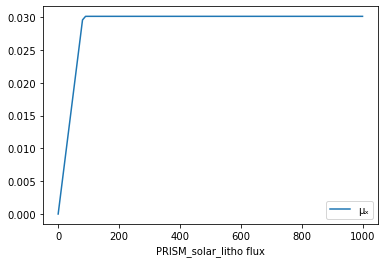

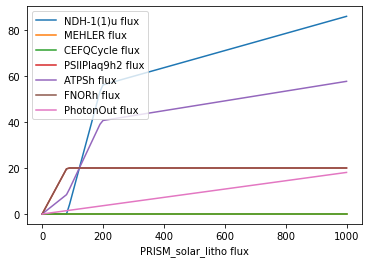

,lb,ub,PRISM_solar_litho flux,μₓ,PhotonOut flux,NDH-1(1)u flux,MEHLER flux,CEFQCycle flux,PSIIPlaq9h2 flux,ATPSh flux,FNORh flux,atp_h flux
0,0.0,0.0,0.0,3.651086e-10,-0.00000,0.000000,0.0,0.0,2.423745e-07,1.038743e-07,2.423745e-07,5.480855e-07
1,10.0,10.0,10.0,3.697870e-03,0.18078,0.000000,0.0,0.0,2.454802e+00,1.052053e+00,2.454802e+00,5.551086e+00
2,20.0,20.0,20.0,7.395740e-03,0.36156,0.000000,0.0,0.0,4.909605e+00,2.104106e+00,4.909605e+00,1.110217e+01
3,30.0,30.0,30.0,1.109361e-02,0.54234,0.000000,0.0,0.0,7.364407e+00,3.156158e+00,7.364407e+00,1.665326e+01
4,40.0,40.0,40.0,1.479148e-02,0.72312,0.000000,0.0,0.0,9.819209e+00,4.208211e+00,9.819209e+00,2.220434e+01
...,...,...,...,...,...,...,...,...,...,...,...,...
96,960.0,960.0,960.0,3.012764e-02,17.35488,84.440135,0.0,0.0,2.000000e+01,5.682289e+01,2.000000e+01,1.899809e+02
97,970.0,970.0,970.0,3.012764e-02,17.53566,84.812270,0.0,0.0,2.000000e+01,5.703554e+01,2.000000e+01,1.906188e+02
98,980.0,980.0,980.0,3.012764e-02,17.71644,85.184405,0.0,0.0,2.000000e+01,5.724819e+01,2.000000e+01,1.912567e+02
99,990.0,990.0,990.0,3.012764e-02,17.89722,85.556540,0.0,0.0,2.000000e+01,5.746084e+01,2.000000e+01,1.918947e+02


In [92]:
# modelTest.reactions.OXYG1DEGp655.bounds = (0, 0.025)
modelTest.reactions.PSIIPlaq9h2.bounds = (0, 20)
# modelTest.reactions.get_by_id('NDH-1(1)u').bounds = (0, 15)
# modelTest.reactions.CEFQCycle.bounds = (0, 15)
# modelTest.reactions.SINGLETOxP680.bounds = (1, 400)
# modelTest.reactions.BCaro1O2STTrns.bounds = (0, 4)

# reaction = [rxn.id for rxn in modelTest.reactions if 'OUTphoton' in rxn.id]
reaction = ['NDH-1(1)u', 'MEHLER', 'CEFQCycle', 'PSIIPlaq9h2', 'ATPSh', 'FNORh']
# reaction = ['PSIIblue', 'PSIIred', 'PSIblue', 'PSIred', 'ATPSh', 'FNORh', 'CEF']

df = MRSA_metRep(modelTest, 100, 'atp_h', RxnDMid = 'PRISM_solar_litho', RxnTest = reaction, boundtype = 'forced', upperb = 1000, lowerb = 0)
df.plot(x = 'PRISM_solar_litho' + ' flux', y = '\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}', kind = 'line')

for rxn in reaction:
    if reaction.index(rxn) == 0:
        ax = df.plot(x = 'PRISM_solar_litho' + ' flux', y = rxn + ' flux', kind = 'line')
    else:
        df.plot(ax = ax, x = 'PRISM_solar_litho' + ' flux', y = rxn + ' flux', kind = 'line')

df.plot(ax = ax, x = 'PRISM_solar_litho' + ' flux', y = 'PhotonOut flux', kind = 'line')

plt.show()

df


In [91]:
modelTest.reactions.PRISM_solar_litho.bounds = (990, 1000)
flux_based_reactions(modelTest, '1o2_u')

,lb,ub,rxn_flux,met_flux,reaction
SINGLETOxChlor,0.0,1000.0,426.051332,426.051332,chla3_u + o2_u --> 1o2_u + chla_u
BCaro1O2STTrns,0.0,1000.0,426.051332,-426.051332,1o2_u + caroExc_u --> caro_u + o2_u
PlaqNPQ1,0.0,1000.0,0.0,-0.0,1o2_u + 2.0 plaq9h2_u --> 2.0 h2o_u + 2.0 plaq9_u
PlaqNPQ2,0.0,1000.0,0.0,-0.0,1o2_u + 3.0 h_h + plaq9_u --> h2o_u + plaq9oh_u
OXYG1DEGp655,0.0,50.0,0.0,-0.0,2.0 1o2_u --> 2.0 o2_u + photon655_u
DAMD1_P680,0.0,1000.0,0.0,-0.0,1o2_u + psII_680_u --> psII_680Deg_u
DAMD1_OEC,0.0,1000.0,0.0,0.0,2.0 o2_u + oecd2_u + psII_680ox_u --> 1o2_u + h_u + mn2_u + oecd3_u + psII_680Deg_u
SINGLETOxP680,0.0,1000.0,0.0,0.0,3psII_680_u + o2_u --> 1o2_u + psII_680_u


#### **4.4.4** Algorythm to process MSA analysis through all new metabolites

In [ ]:
MSADictFin = {}

In [ ]:
N = 100
MSADict = {}
for met in MetList:
    MSADict[met.id] = {}
    print(met.id)
    ub = 1000
    lb = 0
    mu = 1
    i = 0

    rxn = RxnDM_MSA(modelTest, met.id, ub, lb)
    while mu > 1.0e-5:
        metDict = MSA_metFin(modelTest, N, rxn, ub, lb)
        step = (ub - lb)/N
        mu = metDict.get('\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}')
        fb = metDict.get('ub')
        
        if fb == 1000 or i >= 5:
            break
        else:
            i += 1
            if fb == 0:
                ub = 6 - i
            else:
                ub = round(fb + step, i) + 10**(-i)
                lb = round(fb - step, i) - 10**(-i)

    MSADict[met.id] = metDict
    modelTest.remove_reactions([rxn])

MSADictFin = MSADictFin | MSADict
pandas.set_option('display.max_colwidth', None)
df = pandas.DataFrame.from_dict(MSADictFin).T
df.loc[df['flux'].abs().sort_values(ascending=False).index]

In [ ]:
df.to_csv('MSA.csv',encoding='utf-8-sig')

### **4.5** Flux Variability Analysis to find the correct constraints to reproduce photoinhibition

### **4.5.1** Flux variablity analysis function

In [335]:
def FVA_react(model, N, rxnid, metid = 'None', rxnType = 'products', boundtype = 'open'):

    if hasattr(model.reactions, rxnid):
        reaction = getattr(model.reactions, rxnid)
    else:
        print("%s is not present in model" % (rxnid))
        return False

    print(reaction.reaction)

    lb = reaction.lower_bound
    ub = reaction.upper_bound
    step = (ub - lb) / N

    if boundtype == 'open':
        bounds = {i: {'ub': lb + (i + 1) * step, 'lb': lb} for i in range(N)}
    elif boundtype == 'forced':
        bounds = {i: {'ub': lb + i * step, 'lb': lb + i * step} for i in range(N)}

    mu_vect = []
    result_dict = {}
    for i in bounds.keys():
        result_dict[i] = {}
        
        reaction.bounds = (bounds[i]['lb'], bounds[i]['ub'])
        solution = model.optimize()
        model.solution = solution
        flux_dict = model.solution.fluxes.to_dict()
        
        result_dict[i]['lb'] = reaction.lower_bound
        result_dict[i]['ub'] = reaction.upper_bound
        result_dict[i]['flux'] = flux_dict[rxnid]
        result_dict[i]['\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}'] = solution.objective_value
        mu_vect.append(solution.objective_value)
        
        metflux = 0
        if hasattr(model.metabolites, metid):
            met = getattr(model.metabolites, metid)
            
            for rxn in met.reactions:
                if met in getattr(rxn, rxnType):
                    metflux = metflux + flux_dict[rxn.id] * rxn.metabolites.get(met)

            result_dict[i][metid + ' flux'] = metflux
    
    mean = reduce(lambda a, b: a + b, mu_vect) / N
    
    sum = 0
    for mu in mu_vect:
        sum = sum + (mu - mean) ** 2
    
    stdDev = (sum / N) ** 0.5

    print('Standard Deviation: %f' %(stdDev))
    print('Data Mean: %f' %(mean))

    pandas.set_option('display.max_colwidth', None)
    df = pandas.DataFrame.from_dict(result_dict).T
    df.plot(x = 'ub', y = '\u03BC\N{LATIN SUBSCRIPT SMALL LETTER X}', kind = 'line')
    plt.show()
    return df.loc[df['ub'].sort_values(ascending=True).index]

2.0 h_h + phphtn_rd_u + plaq9e_u --> phphtna_u + plaq9h2_u


/home/fabian11lrg/anaconda3/envs/cobrapy_env/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Standard Deviation: 0.012898
Data Mean: 0.025494


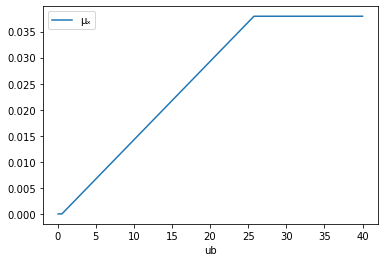

,lb,ub,flux,μₓ,plaq9h2_u flux
0,0.0,0.08,0.571769,0.000000,102.057039
1,0.0,0.16,0.571769,0.000000,102.057039
2,0.0,0.24,0.571769,0.000000,102.057039
3,0.0,0.32,0.571769,0.000000,102.057039
4,0.0,0.40,0.571769,0.000000,102.057039
...,...,...,...,...,...
495,0.0,39.68,26.177648,0.037948,110.761119
496,0.0,39.76,26.177648,0.037948,110.761119
497,0.0,39.84,26.177648,0.037948,110.761119
498,0.0,39.92,26.177648,0.037948,110.761119


In [336]:
# modelTest.reactions.PRISM_solar_litho.bounds = (0, 1000)
modelTest.reactions.PSIIPlaq9h2.bounds = (0.0, 40.0)
# modelTest.reactions.get_by_id('NDH-1(1)u').bounds = (0.0, 20.0)

FVA_react(modelTest, 500, 'PSIIPlaq9h2', 'plaq9h2_u')
